In [3]:
%%capture
!gdown --id 12jCsqTSXmk7BVQvA4wAAdmDwOJqKvTEH

# Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt


# Function - show single column distribution

In [5]:
def dist(column):
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  plt.title(f'{column} Distribution Plot')
  sns.distplot(df[column])

  plt.show()

# Read data and present the columns

In [6]:
df = pd.read_csv('features_31-08-24.csv')
df.shape

(11218, 93)

In [7]:
df.columns

Index(['Unnamed: 0', 'filename', 'date', 'pocsag', 'IP', 'speed_143',
       'azimuth_143', 'latitude_143', 'longitude_143', 'x_143', 'y_143',
       'z_143', 'accident_direction', 'accident_four_direction', 'max_45_55_x',
       'max_45_55_y', 'max_45_55_z', 'min_45_55_x', 'min_45_55_y',
       'min_45_55_z', 'max_abs_45_55_x', 'max_abs_45_55_y', 'max_abs_45_55_z',
       'max_48_52_x', 'max_48_52_y', 'max_48_52_z', 'min_48_52_x',
       'min_48_52_y', 'min_48_52_z', 'max_abs_48_52_x', 'max_abs_48_52_y',
       'max_abs_48_52_z', 'is_grater08_abs_x', 'is_grater08_abs_y',
       'is_grater18_abs_z', 'mean_45_55_x', 'mean_45_55_y', 'mean_45_55_z',
       'total_accelerated_45_55_xyz', 'median_45_55_x', 'median_45_55_y',
       'median_45_55_z', 'std_45_55_x', 'std_45_55_y', 'std_45_55_z',
       'variance_45_55_x', 'variance_45_55_y', 'variance_45_55_z',
       'mean_48_52_x', 'mean_48_52_y', 'mean_48_52_z',
       'total_accelerated_48_52_xyz', 'median_48_52_x', 'median_48_52_y',
     

In [8]:
df.head()

Unnamed: 0                            filename                 date  \
0           0  2020-04-02_pocsag_-2029972679.json  2020/04/02 10:51:11   
1           1  2020-04-03_pocsag_-1509882569.json  2020/04/03 12:38:34   
2           2    2020-04-12_pocsag_771879225.json  2020/04/12 12:08:26   
3           3   2020-04-14_pocsag_1241622068.json  2020/04/14 06:21:08   
4           4   2020-04-17_pocsag_-469688012.json  2020/04/17 07:53:56   

       pocsag           IP  speed_143  azimuth_143  latitude_143  \
0 -2029972679  57.19.1.135       90.0         41.0     32.157940   
1 -1509882569   55.5.1.166        0.0        156.0     32.083665   
2   771879225  57.241.1.46        0.0        110.0     32.786349   
3  1241622068  52.166.1.74        0.0         57.0     32.817110   
4  -469688012  52.33.1.228       14.0        205.0     32.022746   

   longitude_143     x_143  ...  th_05_more_then_5_spikes_55_76_x  \
0      34.874805 -0.745455  ...                                 0   
1      34.840595  1.163636  ...                                 0   
2      35.491939  0.800000  ...                                 0   
3      35.003075  0.218182  ...                                 1   
4      34.911138 -1.709091  ...                                 1   

   th_05_more_then_10_spikes_55_76_x  th_05_more_then_5_spikes_55_76_z  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  1                                 1   
4                                  1                                 1   

  th_05_more_then_05_x_and_th_25_more_then_05_z_spikes_55_76  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  1           
4                                                  1           

   th_05_more_then_10_x_and_th_25_more_then_05_z_spikes_55_76  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  1            
4                                                  1            

   x_above_th_in_millisec  y_above_th_in_millisec  z_above_th_in_millisec  \
0                     0.0                   200.0                   200.0   
1                   100.0                     0.0                     0.0   
2                   140.0                     0.0                     0.0   
3                   120.0                   420.0                   120.0   
4                   100.0                   280.0                   140.0   

   spikes_55_76  label  
0             0      1  
1             0      1  
2             0      1  
3             1      1  
4             1      1  

[5 rows x 93 columns]

In [9]:
dist_columns = ['label','speed_143', 'x_143', 'y_143', 'z_143','spikes_55_76',
       'max_45_55_x', 'max_45_55_y', 'max_45_55_z', 'min_45_55_x',
       'min_45_55_y', 'min_45_55_z', 'max_abs_45_55_x', 'max_abs_45_55_y',
       'max_abs_45_55_z', 'max_48_52_x', 'max_48_52_y', 'max_48_52_z',
       'min_48_52_x', 'min_48_52_y', 'min_48_52_z', 'max_abs_48_52_x',
       'max_abs_48_52_y', 'max_abs_48_52_z', 'is_grater08_abs_x',
       'is_grater08_abs_y', 'is_grater18_abs_z', 'mean_45_55_x',
       'mean_45_55_y', 'mean_45_55_z', 'median_45_55_x', 'median_45_55_y',
       'median_45_55_z', 'std_45_55_x', 'std_45_55_y', 'std_45_55_z',
       'variance_45_55_x', 'variance_45_55_y', 'variance_45_55_z',
       'mean_48_52_x', 'mean_48_52_y', 'mean_48_52_z', 'median_48_52_x',
       'median_48_52_y', 'median_48_52_z', 'std_48_52_x', 'std_48_52_y',
       'std_48_52_z', 'variance_48_52_x', 'variance_48_52_y',
       'variance_48_52_z', 'over_15_on_55', 'over_15_on_70', 'sum_45_55_x',
       'sum_45_55_y', 'sum_45_55_z', 'sum_48_52_x', 'sum_48_52_y',
       'sum_48_52_z', 'dist_max_min_45_55_x', 'dist_max_min_45_55_y',
       'dist_max_min_45_55_z', 'dist_max_min_48_52_x', 'dist_max_min_48_52_y',
       'dist_max_min_48_52_z']

In [10]:
real_acc = df.loc[df['label'] == 1]
not_acc = df.loc[df['label'] == 0]

In [11]:
real_acc.values.shape

(3383, 93)

In [12]:
not_acc.values.shape

(7835, 93)

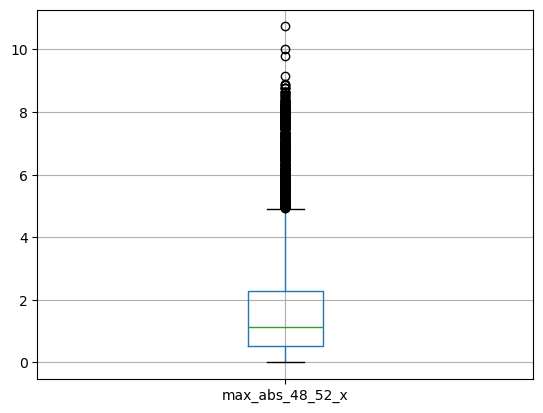

In [13]:
df[['max_abs_48_52_x']].boxplot()
plt.show()


# Run over all columns and show distributions

In [76]:
for c in dist_columns:
  try:
    dist(df, c)
  except:
    print(f'{c} is not callable')

# Run over all 45-55 seconds window columns and show distributions

In [15]:
dist_columns_45_55 = ['max_abs_45_55_x', 'max_abs_45_55_y', 'max_abs_45_55_z', 
       'dist_max_min_45_55_x', 'dist_max_min_45_55_y','dist_max_min_45_55_z',]

## All cases

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

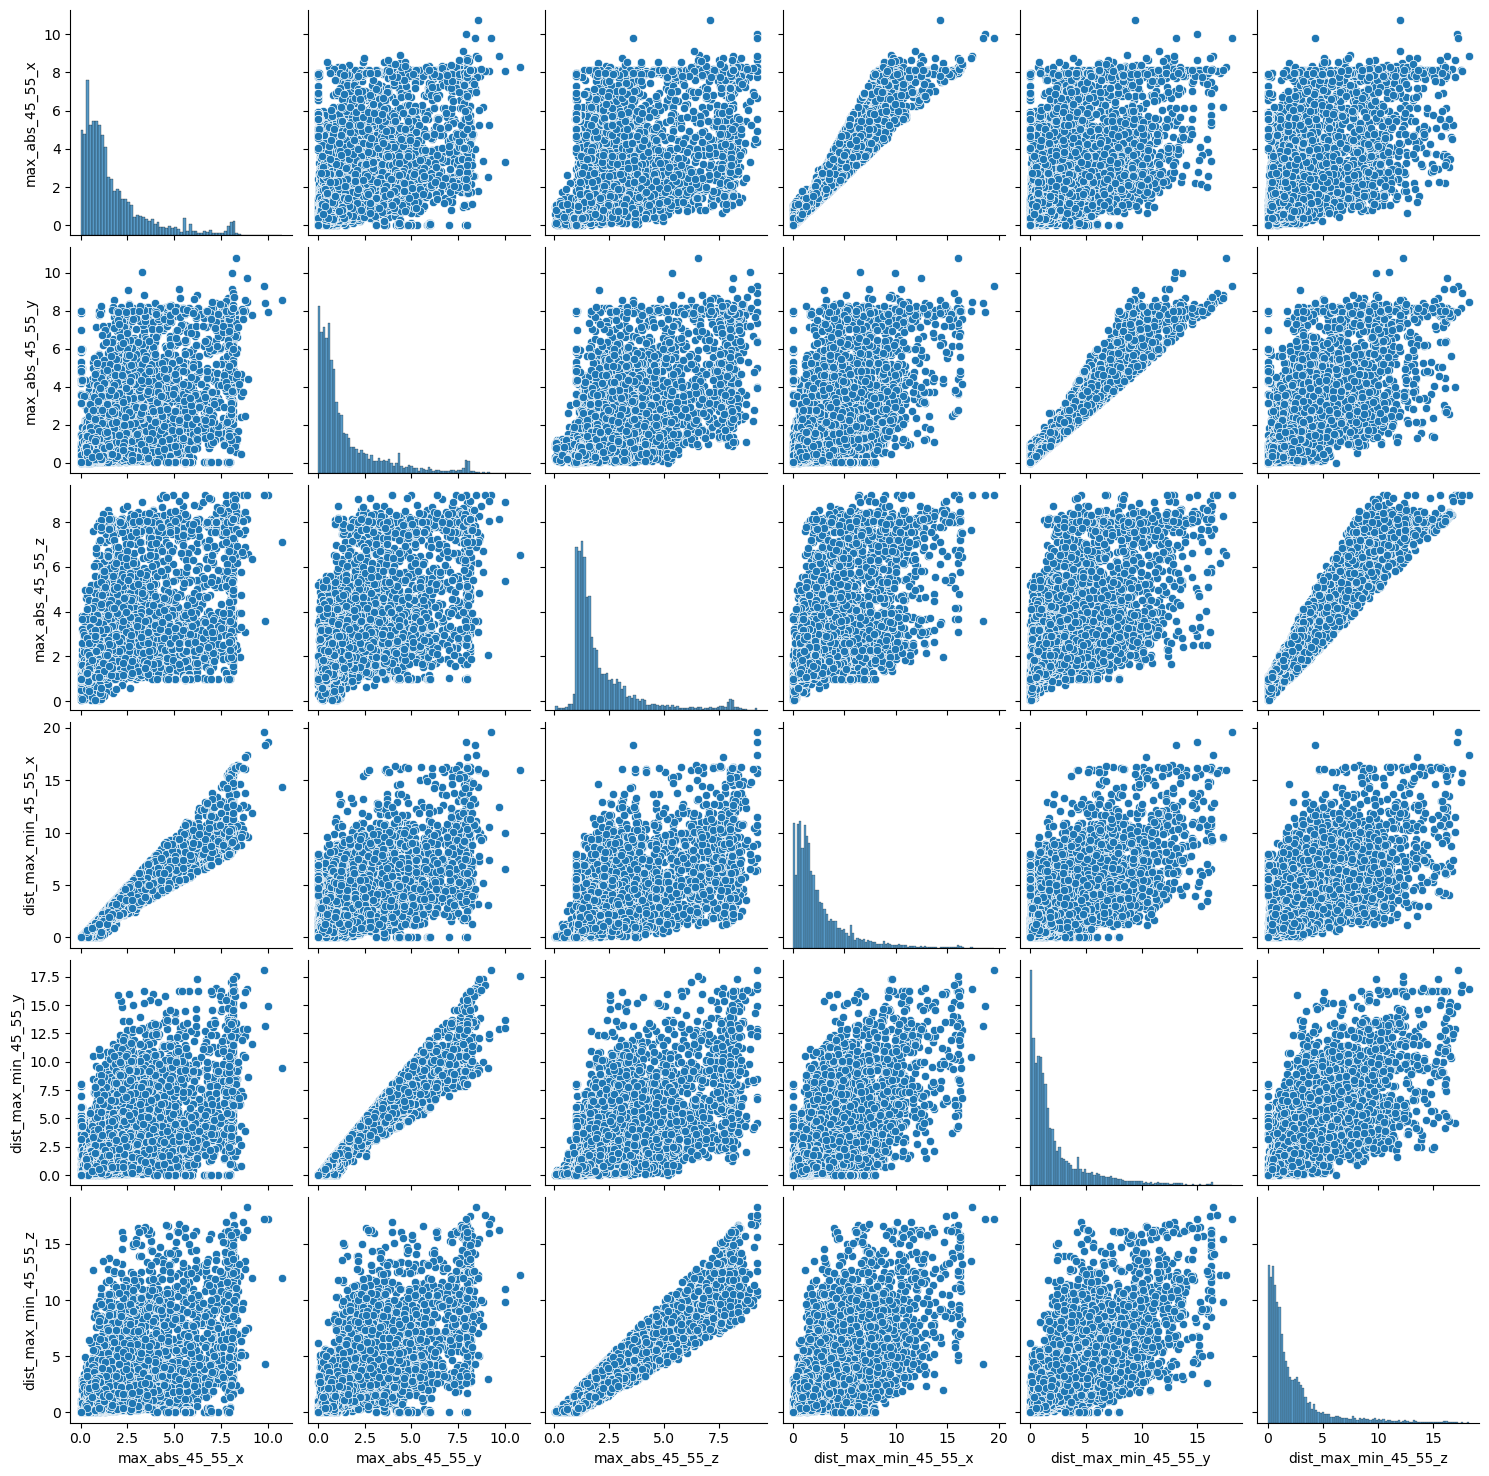

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and dist_columns_45_55 are the columns you are interested in
# Replace infinite values with NaN
df[dist_columns_45_55] = df[dist_columns_45_55].replace([np.inf, -np.inf], np.nan)

# Now use sns.pairplot without triggering the warning
sns.pairplot(df[dist_columns_45_55])
plt.show()



## Real Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

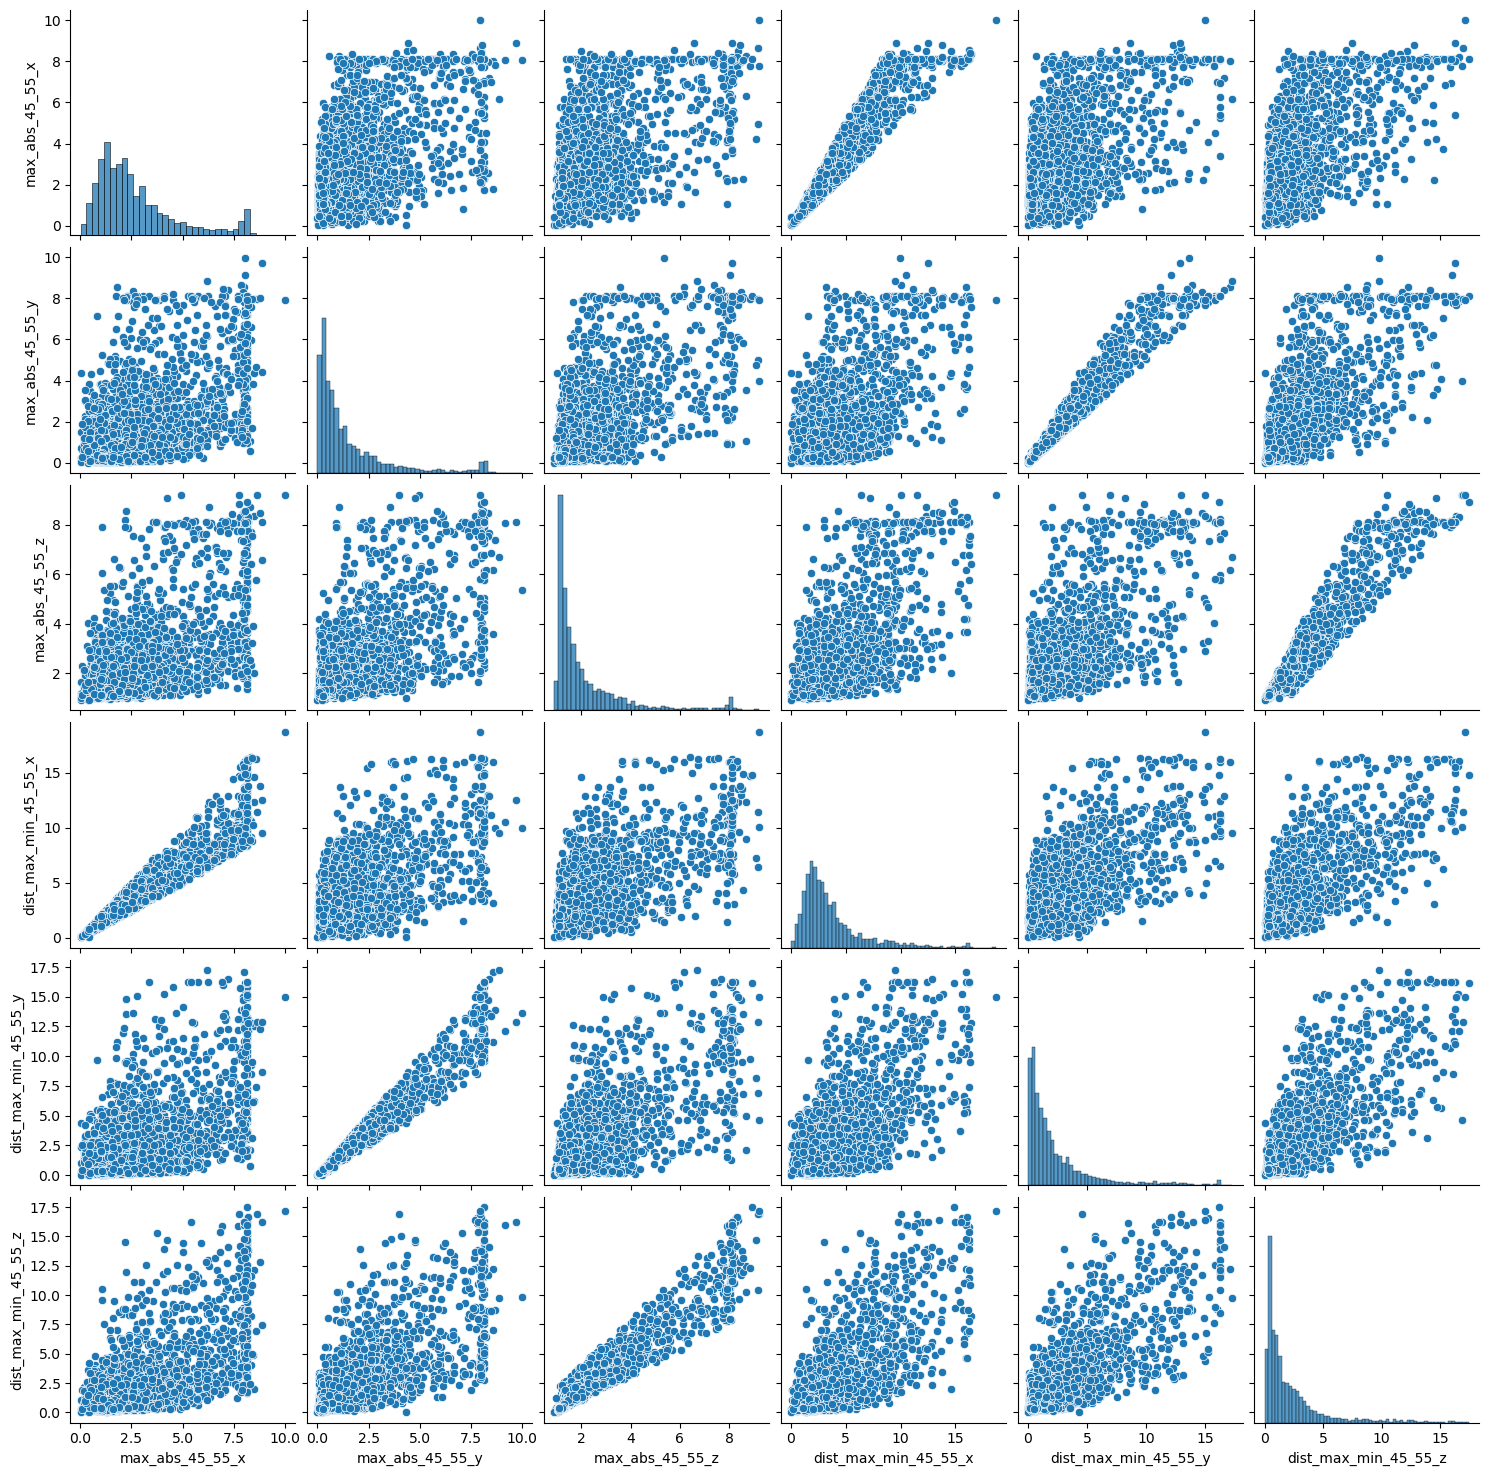

In [17]:
sns.pairplot(real_acc[dist_columns_45_55])
plt.show()

## Not Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

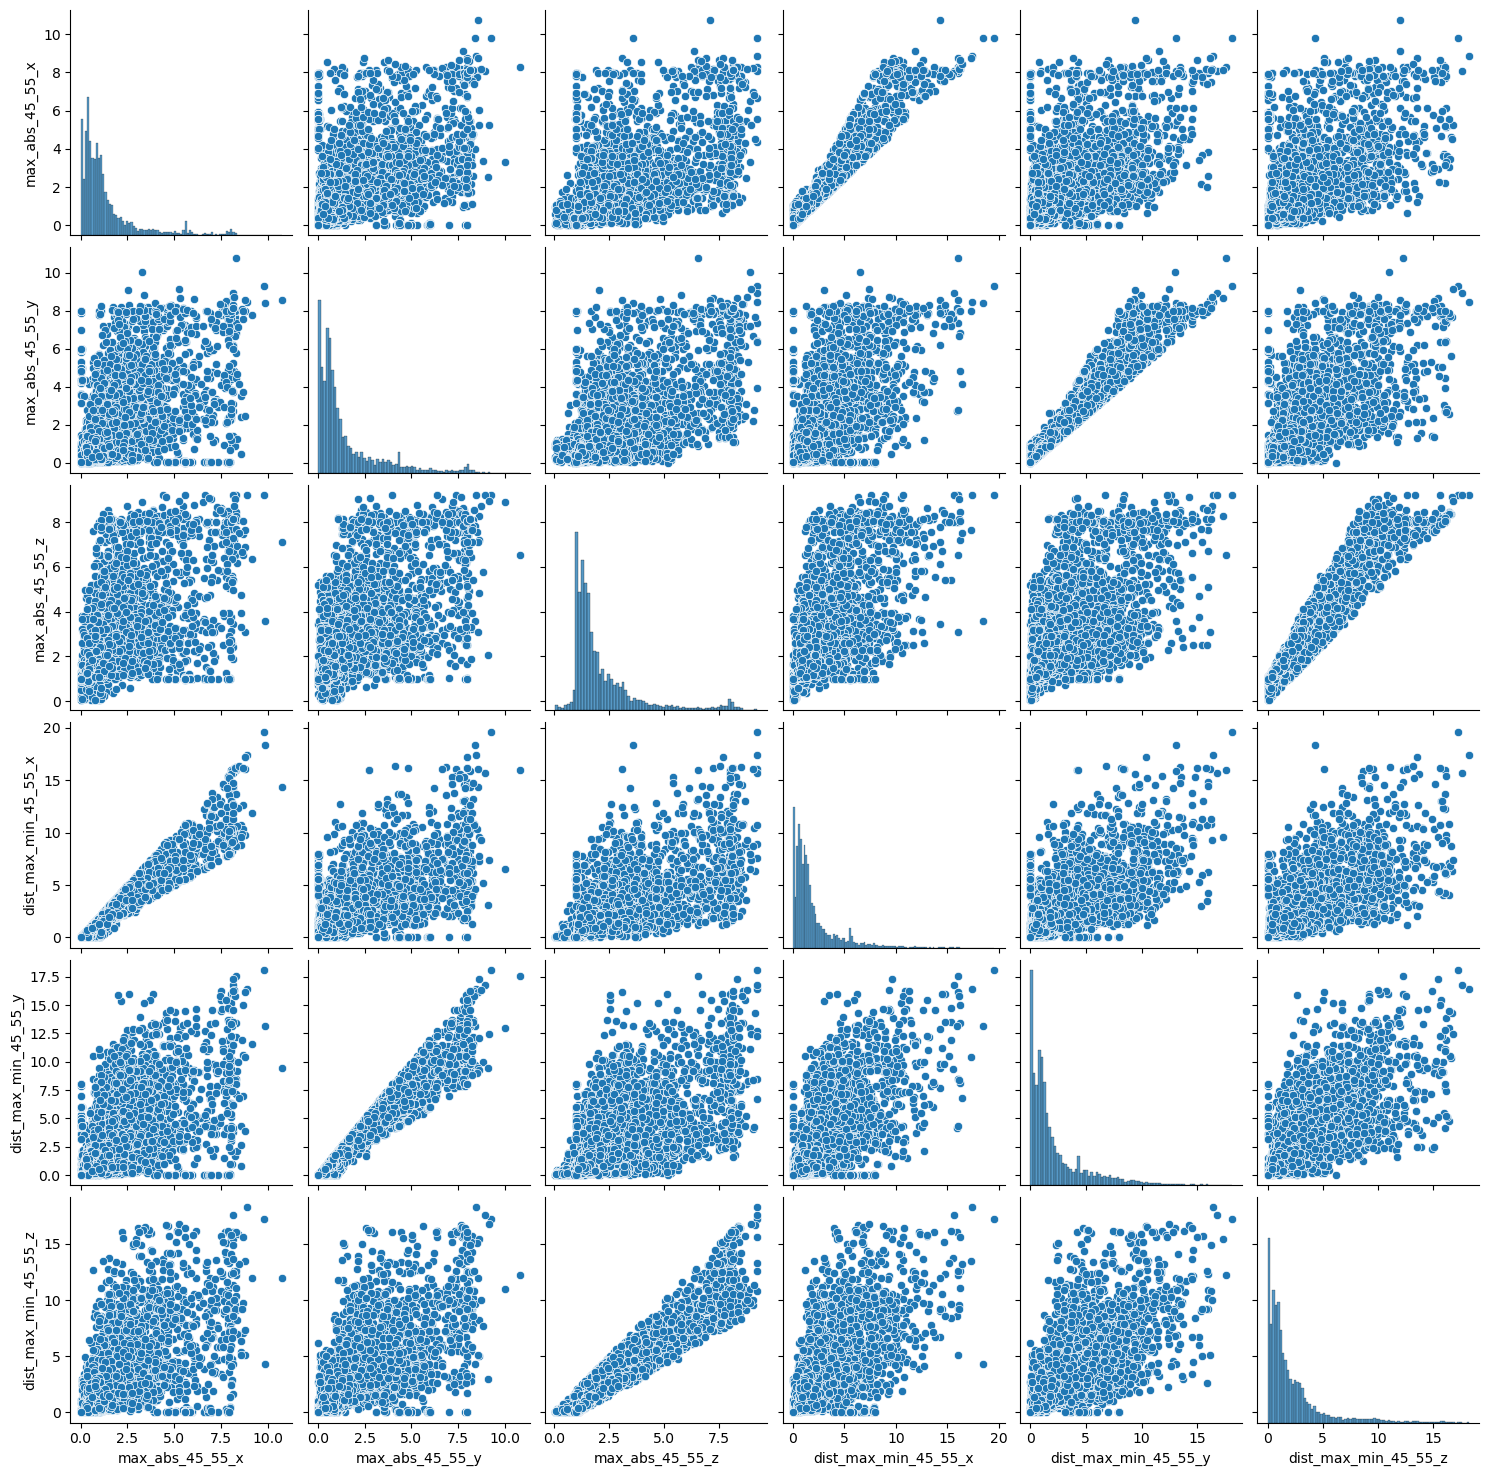

In [18]:
sns.pairplot(not_acc[dist_columns_45_55])
plt.show()

## STD 45-55

## All cases

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


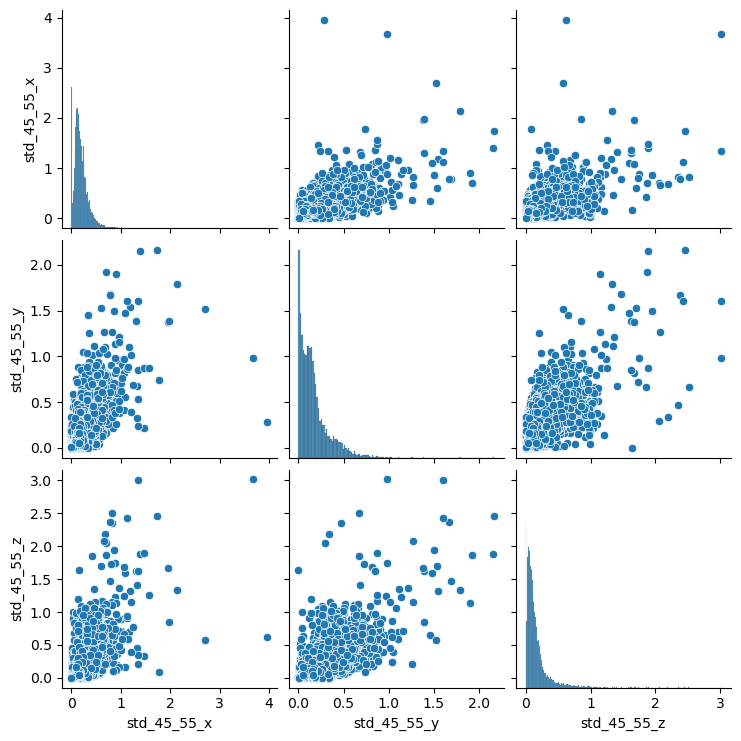

In [19]:
sns.pairplot(df[['std_45_55_x','std_45_55_y','std_45_55_z']])
plt.show()

## Real Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


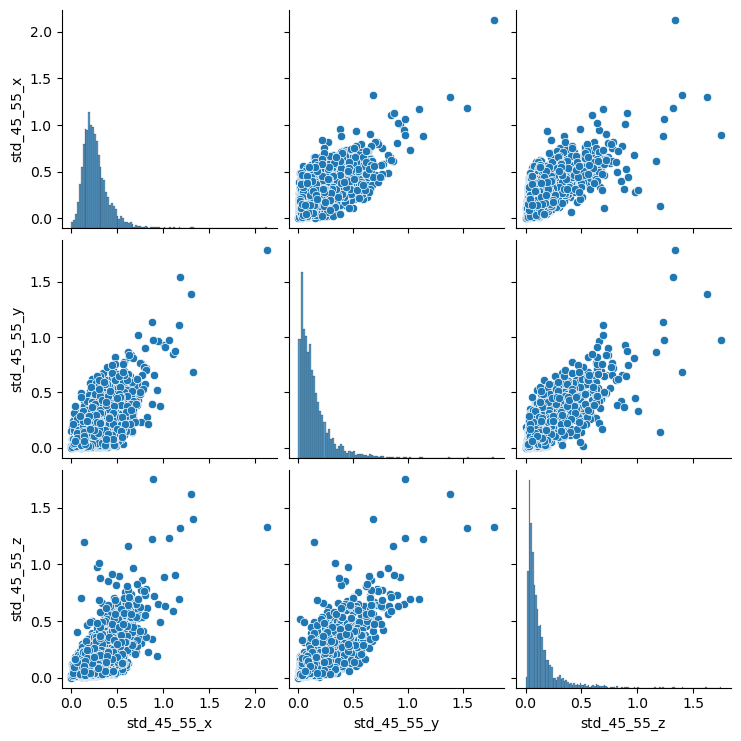

In [20]:
sns.pairplot(real_acc[['std_45_55_x','std_45_55_y','std_45_55_z']])
plt.show()

## Not Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


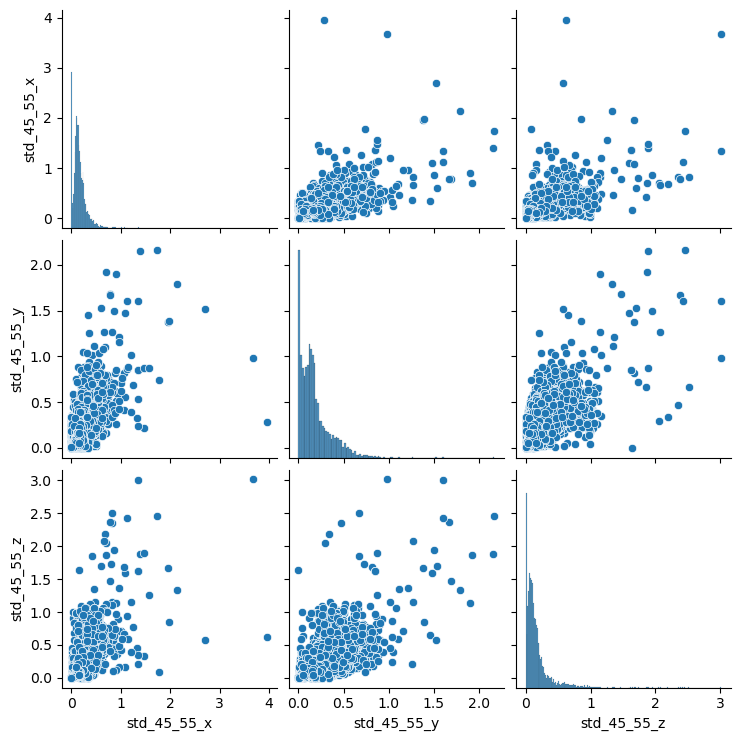

In [21]:
sns.pairplot(not_acc[['std_45_55_x','std_45_55_y','std_45_55_z']])
plt.show()

# Run over all 48-52 seconds window columns and show distributions

In [22]:
dist_columns_48_52 = ['max_abs_48_52_x', 'max_abs_48_52_y', 'max_abs_48_52_z', 
        'dist_max_min_48_52_x', 'dist_max_min_48_52_y','dist_max_min_48_52_z']

## All cases

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

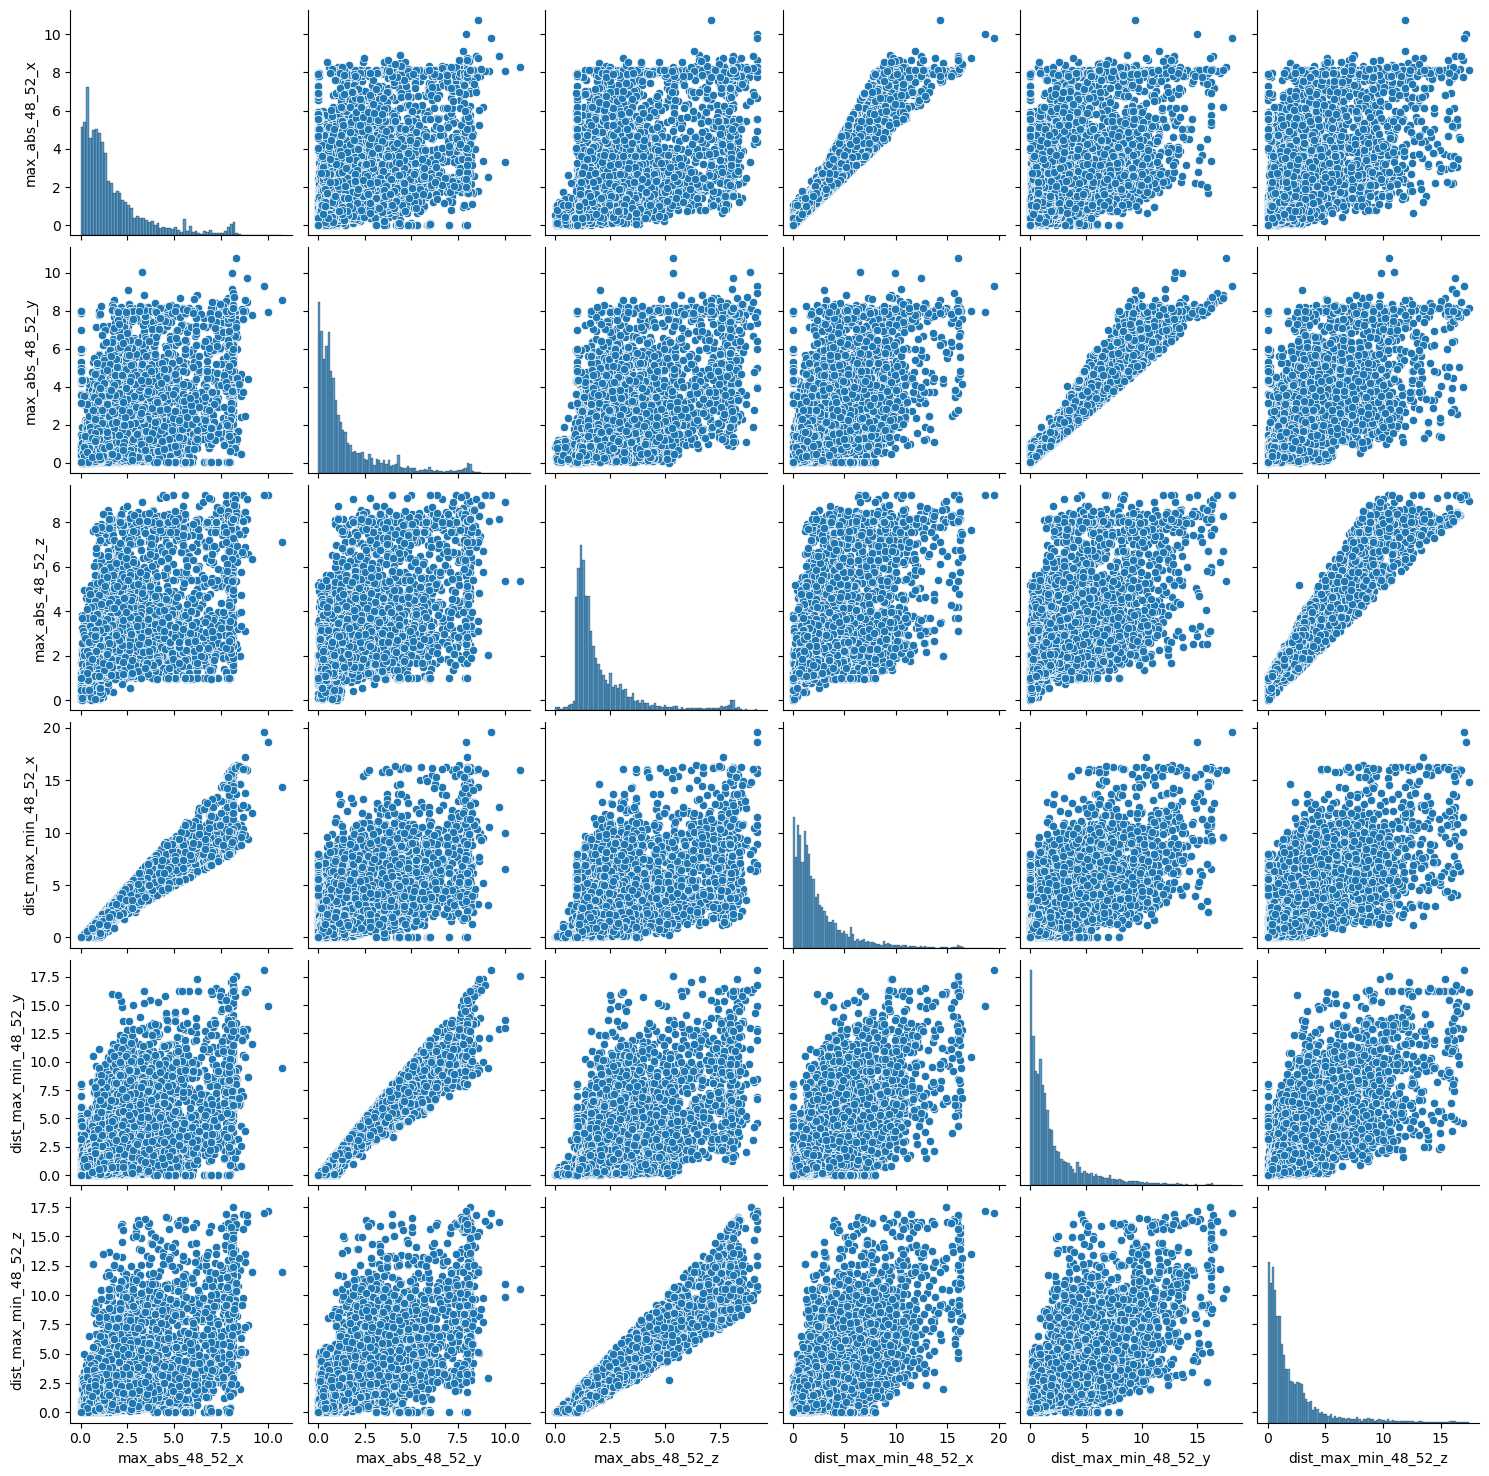

In [23]:
sns.pairplot(df[dist_columns_48_52])
plt.show()

## Real Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

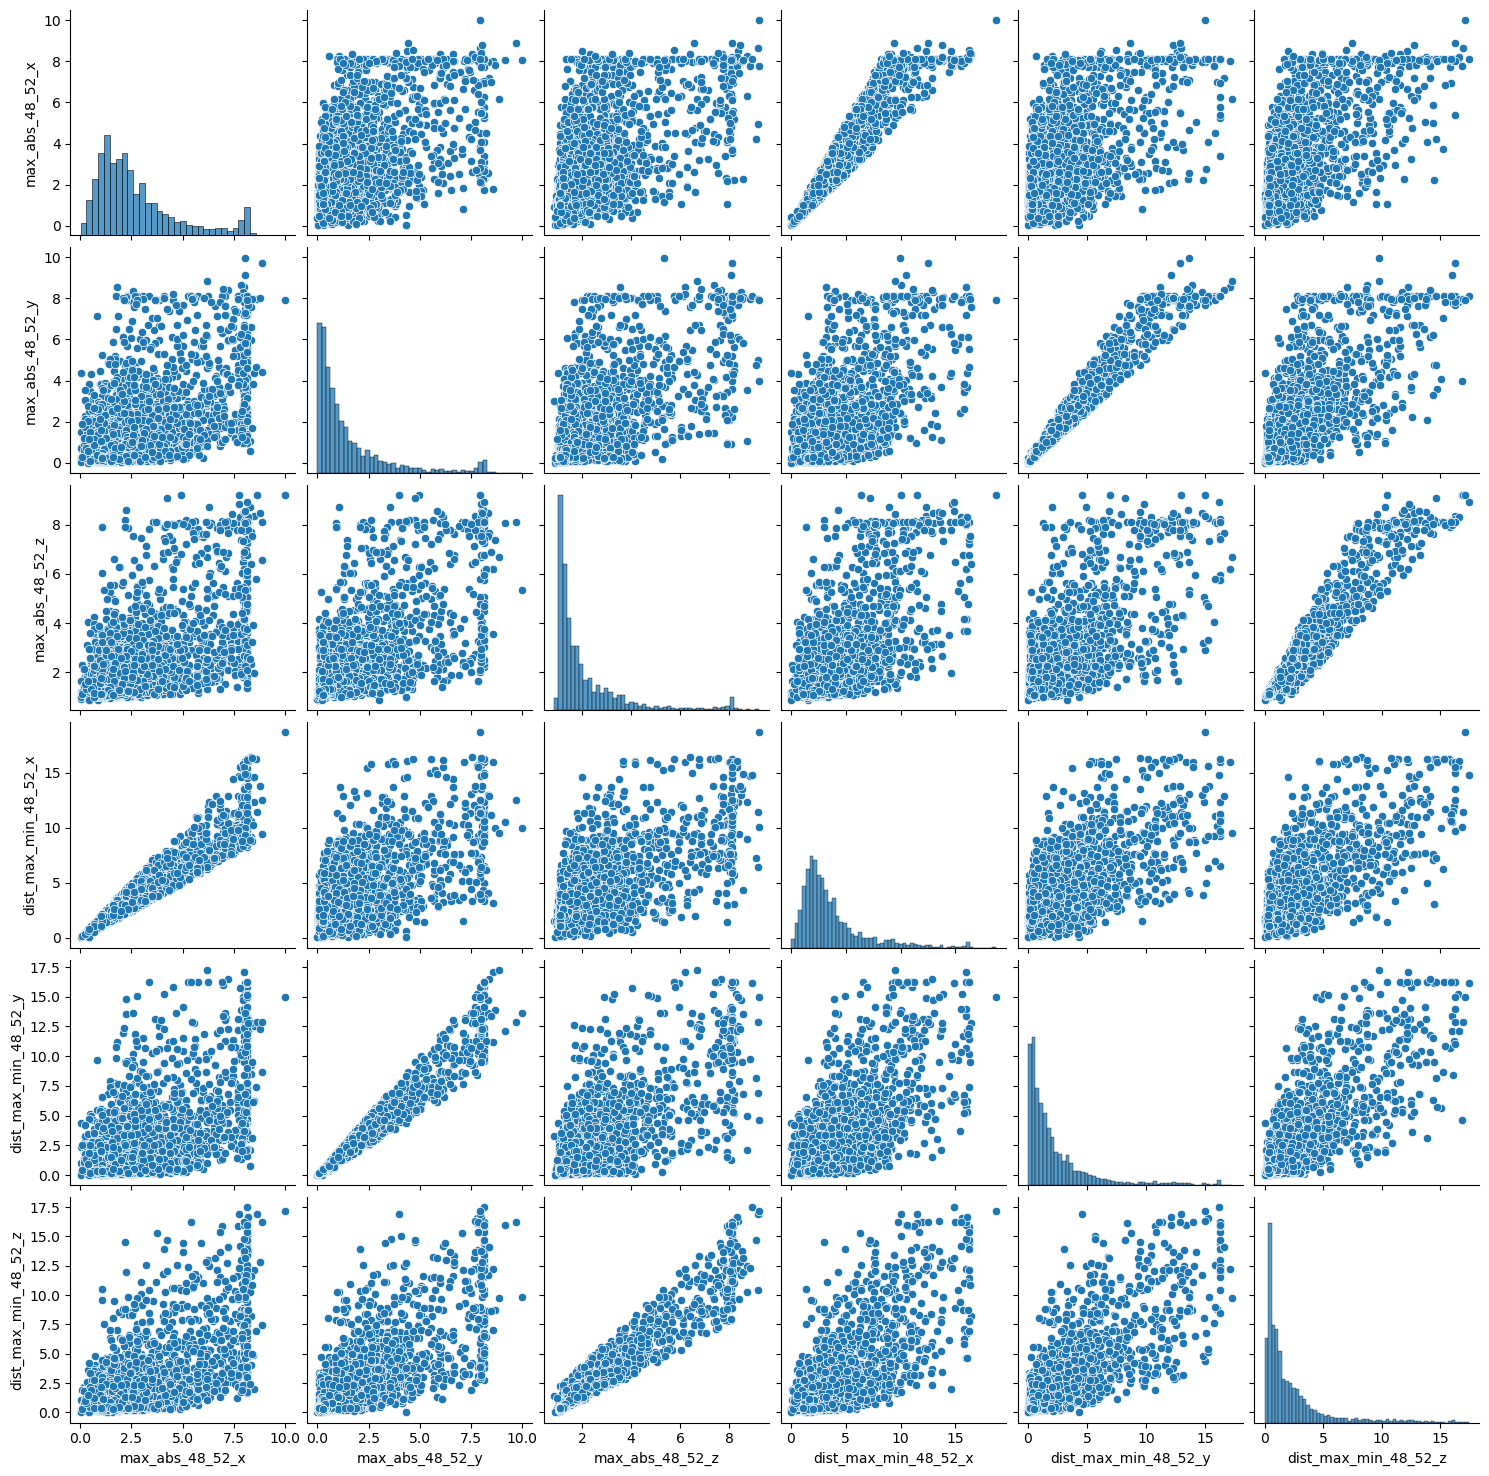

In [24]:
sns.pairplot(real_acc[dist_columns_48_52])
plt.show()

## Not Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

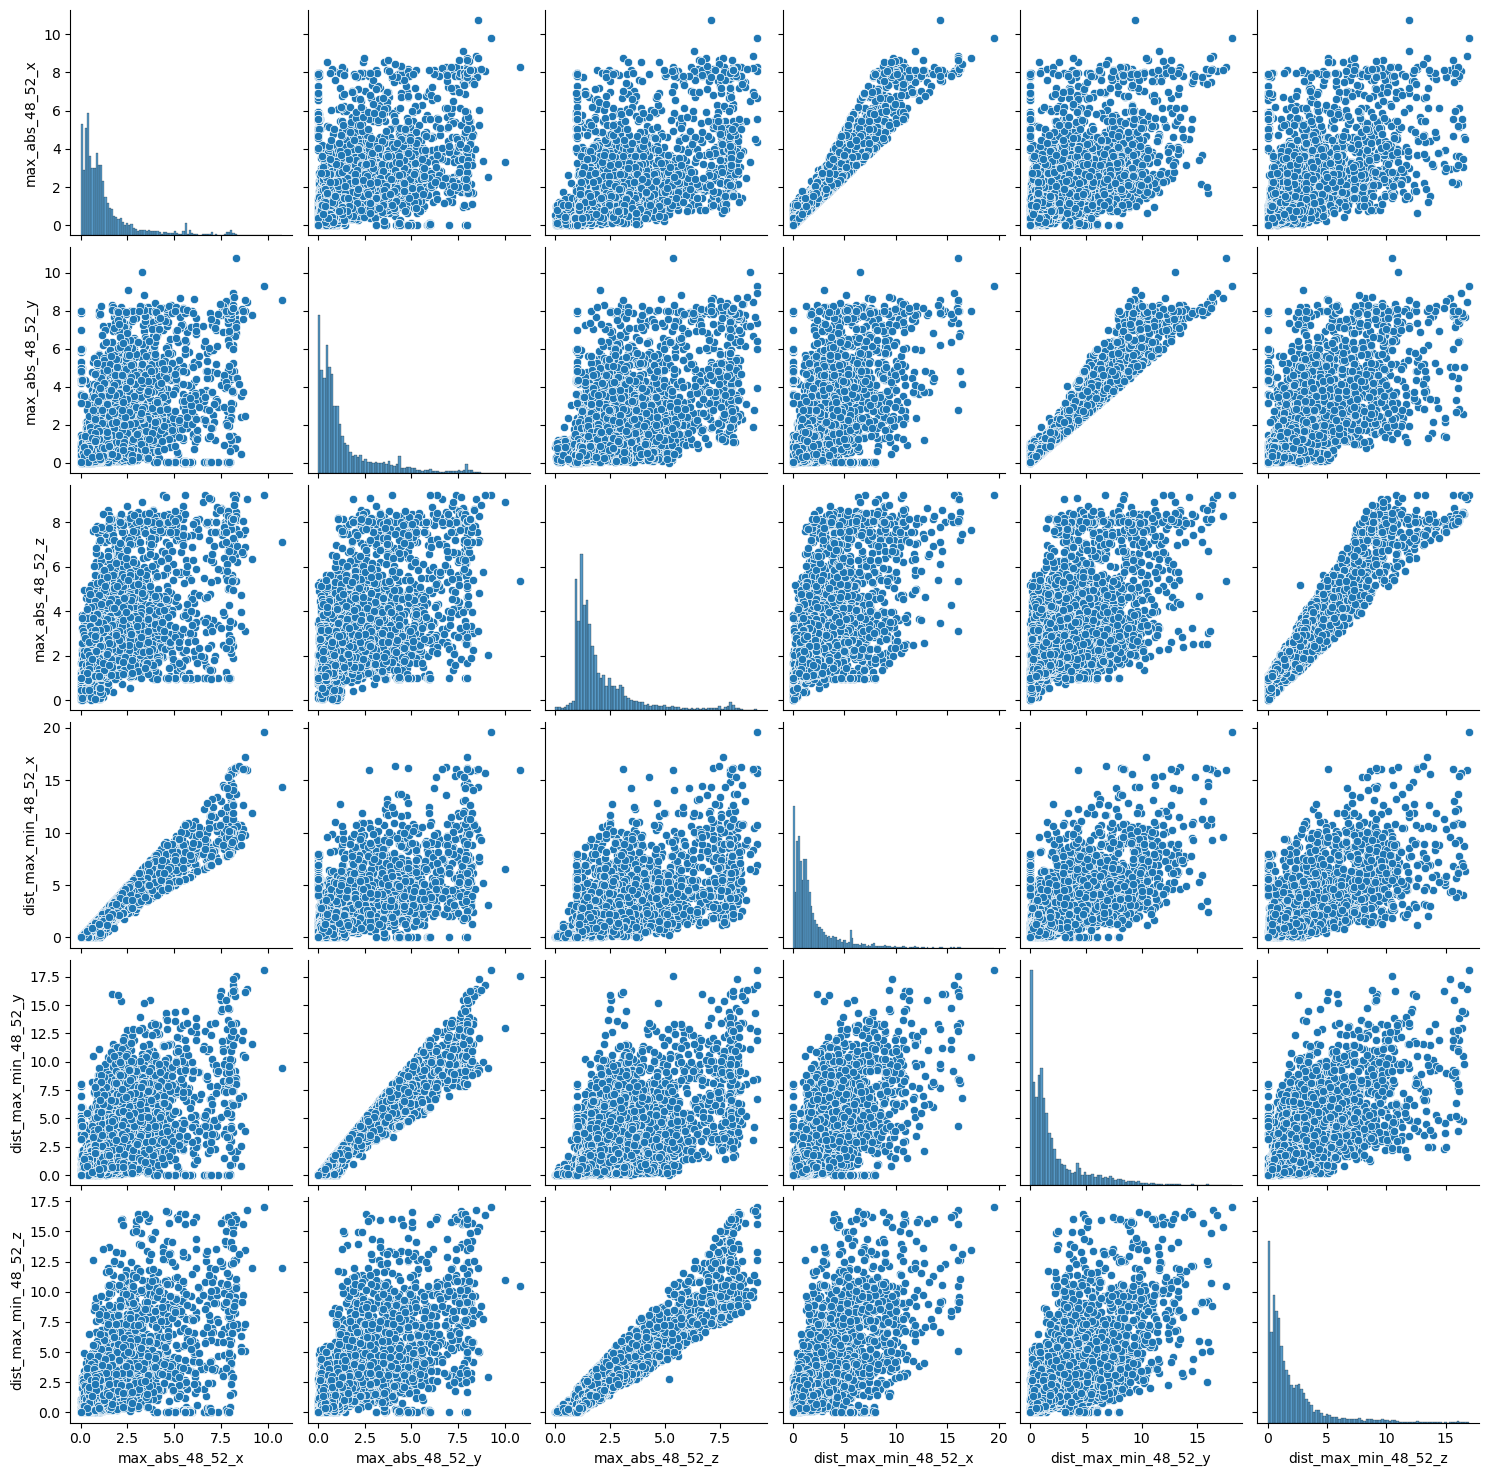

In [25]:
sns.pairplot(not_acc[dist_columns_48_52])
plt.show()

## STD 48-52

## All cases

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


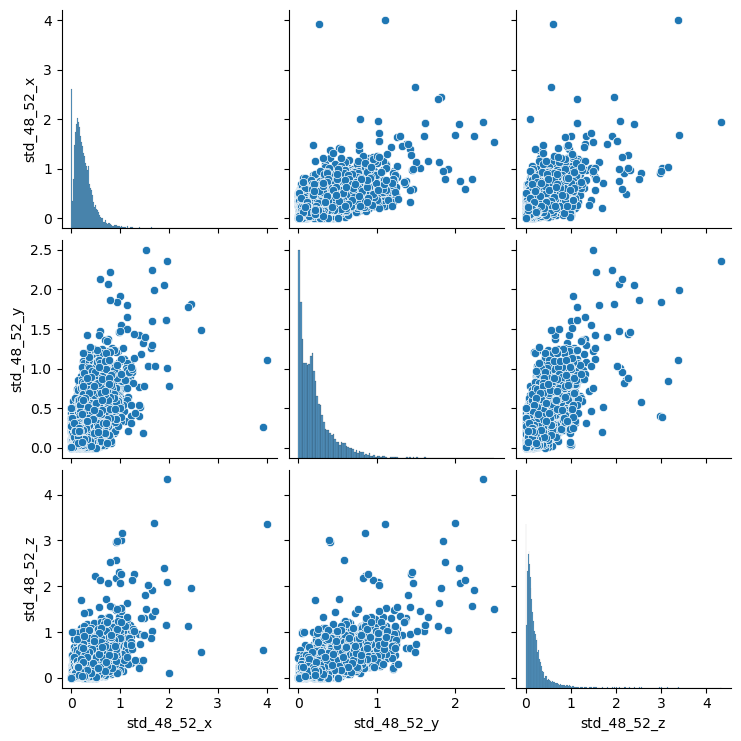

In [26]:
sns.pairplot(df[['std_48_52_x','std_48_52_y','std_48_52_z']])
plt.show()

## Real Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


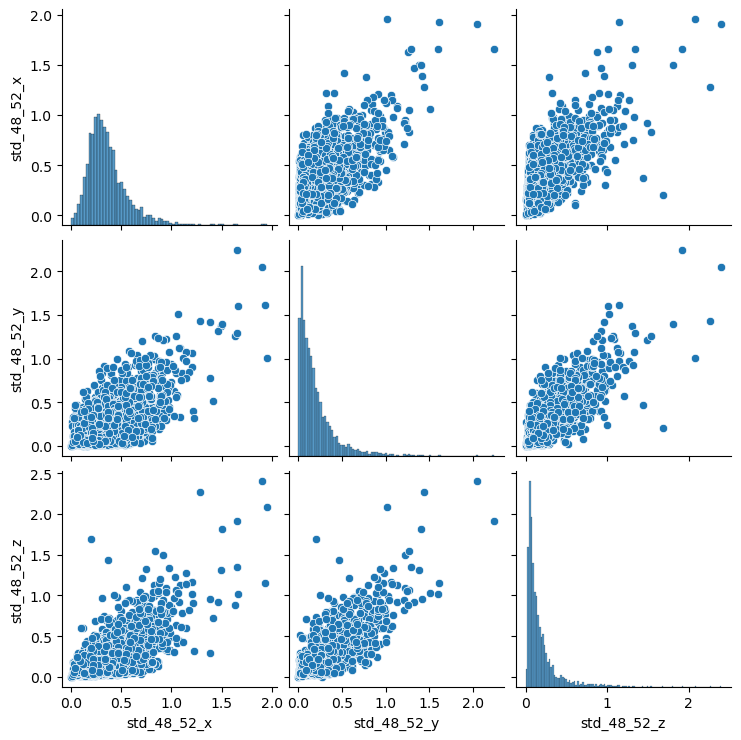

In [27]:
sns.pairplot(real_acc[['std_48_52_x','std_48_52_y','std_48_52_z']])
plt.show()

## Not Accidents

C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\idan_sa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


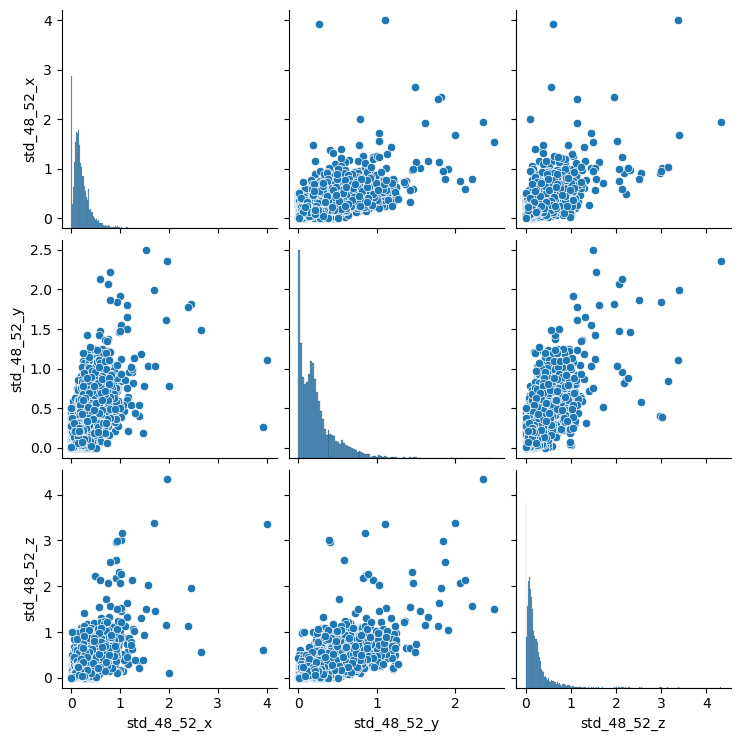

In [28]:
sns.pairplot(not_acc[['std_48_52_x','std_48_52_y','std_48_52_z']])
plt.show()

In [29]:
print(df['is_grater08_abs_x'].unique())
df_zero = df[df['is_grater08_abs_x'] == 0]
print(f"Number of rows where is_grater08_abs_x == 0: {len(df_zero)}")


[1 0]
Number of rows where is_grater08_abs_x == 0: 4031


# Count cases where the maximum absolute value of X is greater then 0.8

## All Cases

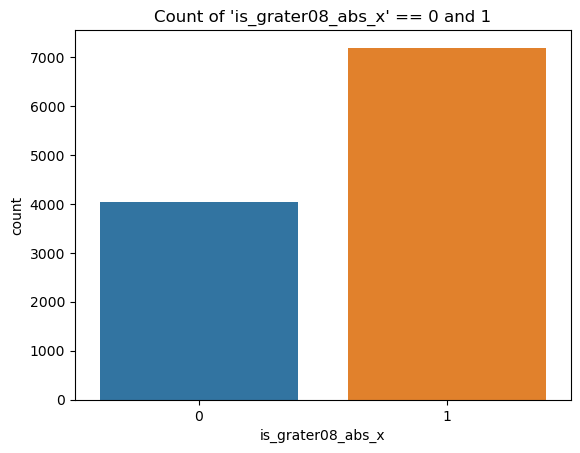

In [30]:

# Plot using seaborn
sns.countplot(data=df, x='is_grater08_abs_x')
plt.title("Count of 'is_grater08_abs_x' == 0 and 1")
plt.show()


## Real Accidents

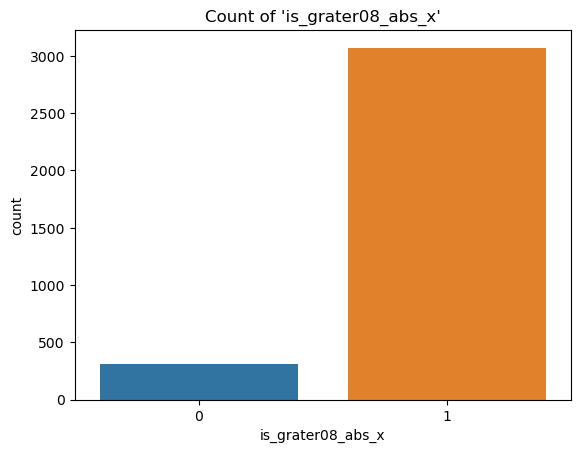

In [31]:
sns.countplot(x='is_grater08_abs_x', data=real_acc)
plt.title("Count of 'is_grater08_abs_x'")
plt.show()


## Not Accidents

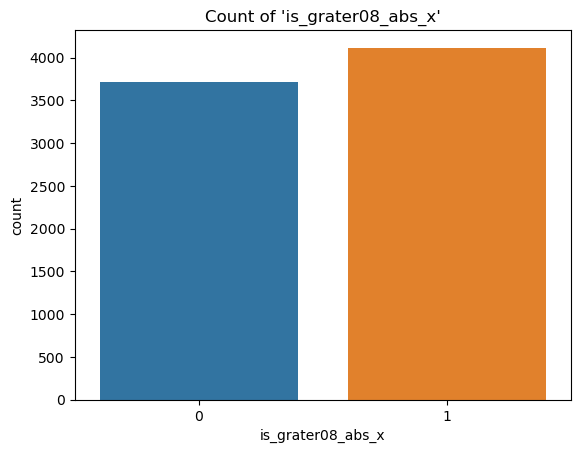

In [32]:
sns.countplot(x='is_grater08_abs_x', data=not_acc)
plt.title("Count of 'is_grater08_abs_x'")
plt.show()


# Count cases where the maximum absolute value of Y is greater then 0.8

## All Cases

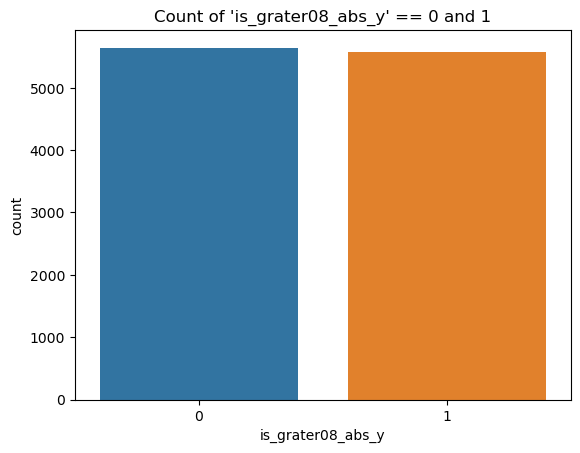

In [33]:

# Plot using seaborn
sns.countplot(data=df, x='is_grater08_abs_y')
plt.title("Count of 'is_grater08_abs_y' == 0 and 1")
plt.show()


## Real Accidents

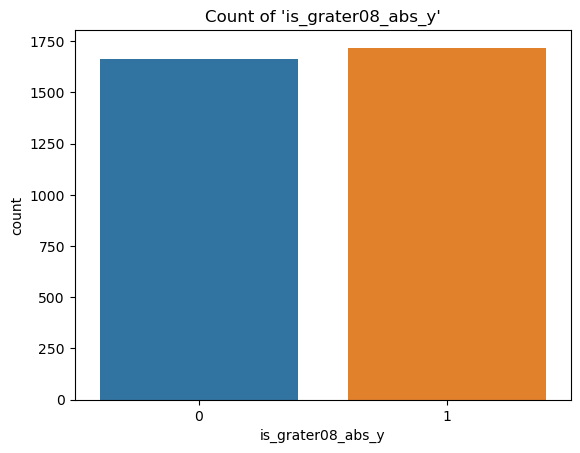

In [34]:
sns.countplot(x='is_grater08_abs_y', data=real_acc)
plt.title("Count of 'is_grater08_abs_y'")
plt.show()


## Not Accidents

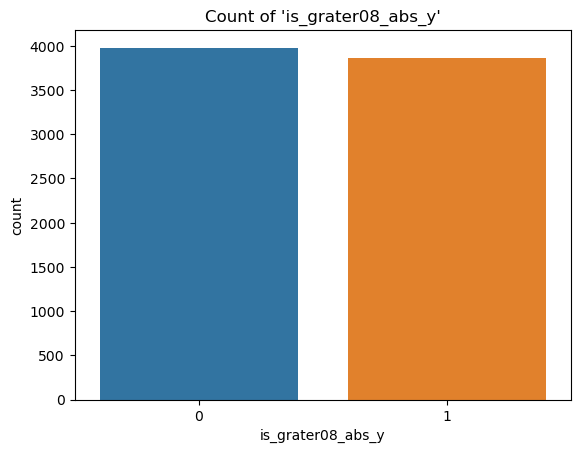

In [35]:
sns.countplot(x='is_grater08_abs_y', data=not_acc)
plt.title("Count of 'is_grater08_abs_y'")
plt.show()


# Count cases where the maximum absolute value of Z is greater then 1.8

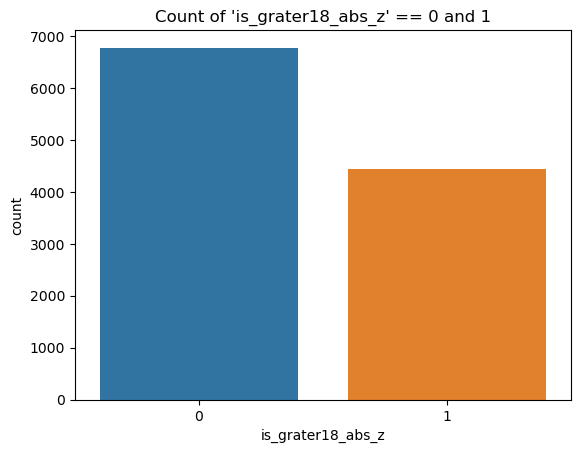

In [36]:
# Plot using seaborn
sns.countplot(data=df, x='is_grater18_abs_z')
plt.title("Count of 'is_grater18_abs_z' == 0 and 1")
plt.show()


## Real Accidents

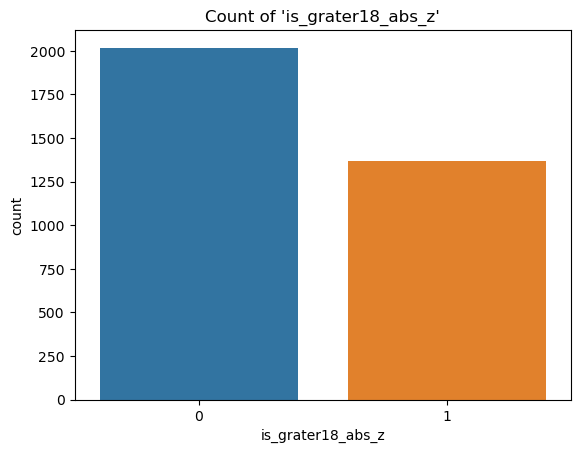

In [37]:
sns.countplot(x='is_grater18_abs_z', data=real_acc)
plt.title("Count of 'is_grater18_abs_z'")
plt.show()


## Not Accidents

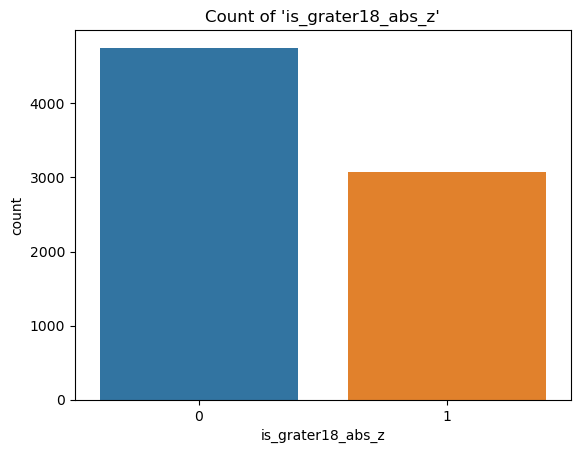

In [38]:
sns.countplot(x='is_grater18_abs_z', data=not_acc)
plt.title("Count of 'is_grater18_abs_z'")
plt.show()


# Count cases in which the vehicle traveled at a speed greater than 15 between seconds 55 and 76

## All Cases

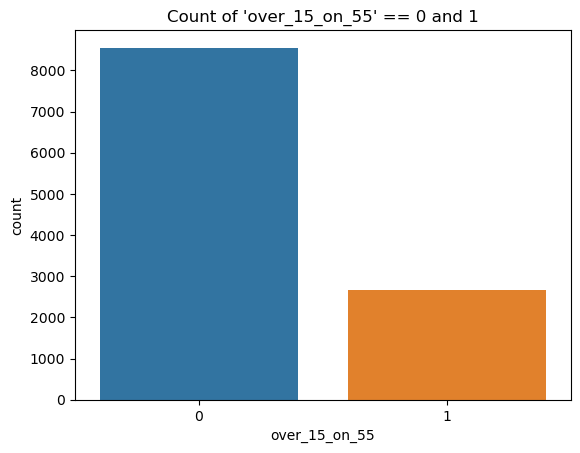

In [39]:
# Plot using seaborn
sns.countplot(data=df, x='over_15_on_55')
plt.title("Count of 'over_15_on_55' == 0 and 1")
plt.show()


## Real Accidents

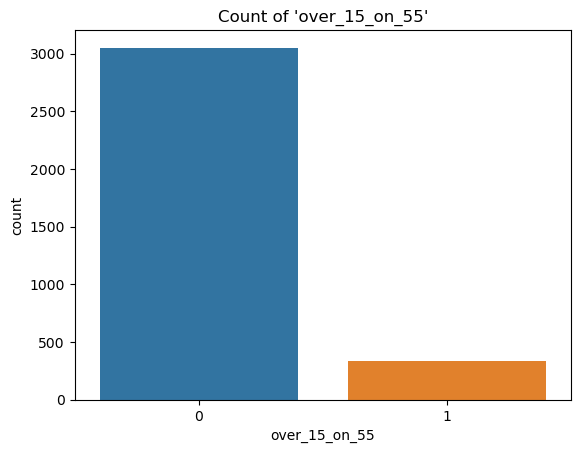

In [40]:
sns.countplot(x='over_15_on_55', data=real_acc)
plt.title("Count of 'over_15_on_55'")
plt.show()


## Not Accidents

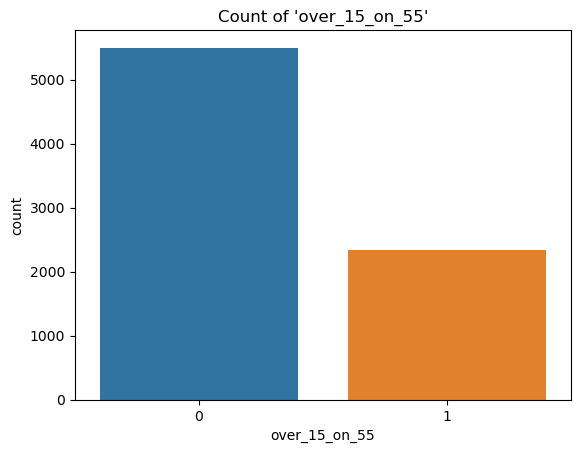

In [41]:
sns.countplot(x='over_15_on_55', data=not_acc)
plt.title("Count of 'over_15_on_55'")
plt.show()


# Count cases in which the vehicle traveled at a speed greater than 15 between seconds 70 and 76

## All Cases

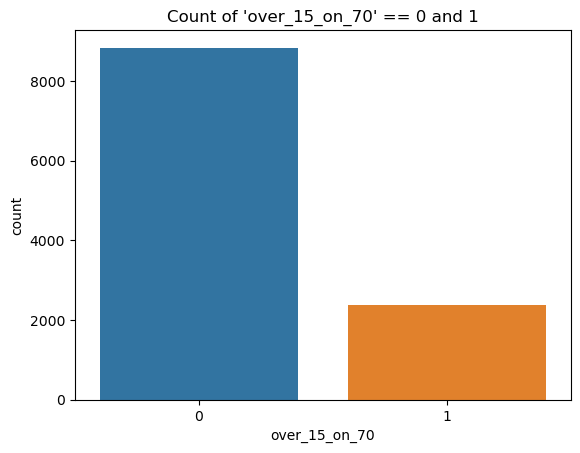

In [42]:
# Plot using seaborn
sns.countplot(data=df, x='over_15_on_70')
plt.title("Count of 'over_15_on_70' == 0 and 1")
plt.show()


## Real Accidents

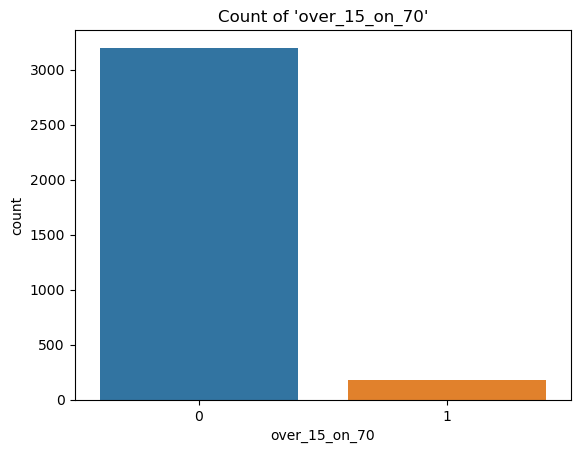

In [43]:
sns.countplot(x='over_15_on_70', data=real_acc)
plt.title("Count of 'over_15_on_70'")
plt.show()


## Not Accidents

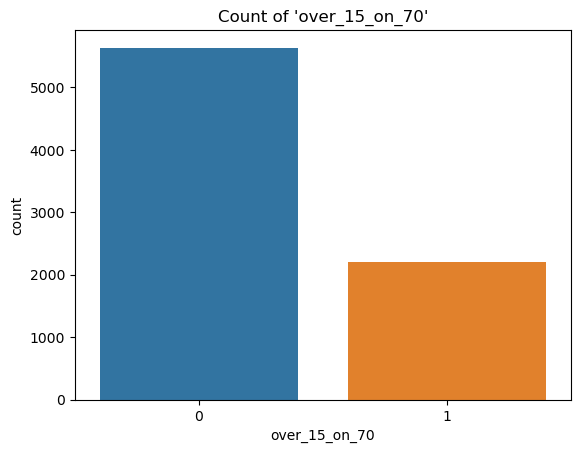

In [44]:
sns.countplot(x='over_15_on_70', data=not_acc)
plt.title("Count of 'over_15_on_70'")
plt.show()


# Spikes between the 55-76 seconds - more then 10 spikes of 0.5 (G-Force)

## All cases

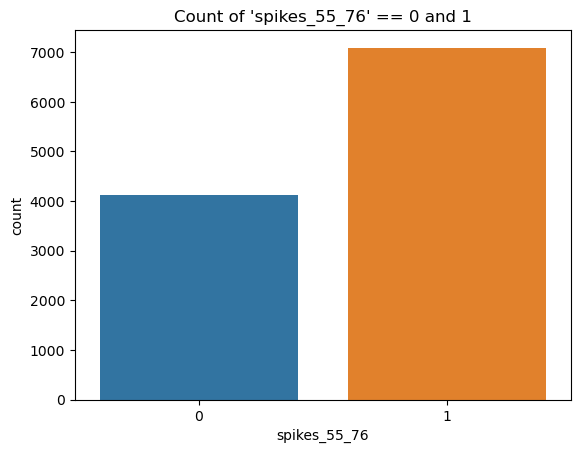

In [45]:
# Plot using seaborn
sns.countplot(data=df, x='spikes_55_76')
plt.title("Count of 'spikes_55_76' == 0 and 1")
plt.show()


## Real Accidents

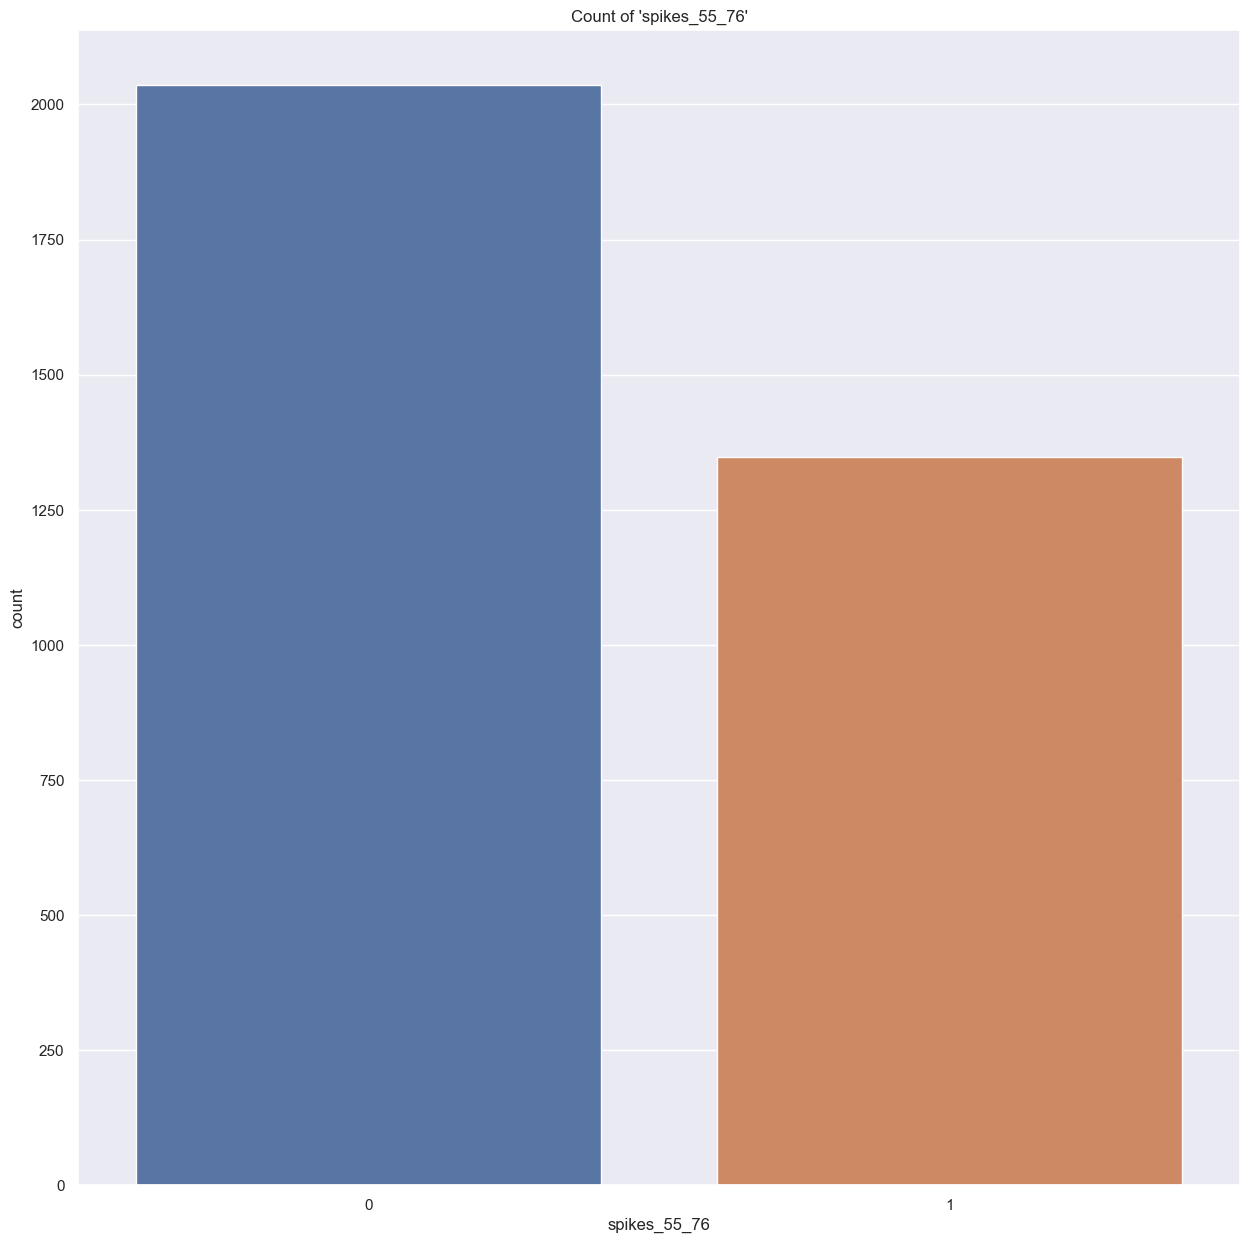

In [75]:
sns.countplot(x='spikes_55_76', data=real_acc)
plt.title("Count of 'spikes_55_76'")
plt.show()


## Not Accidents

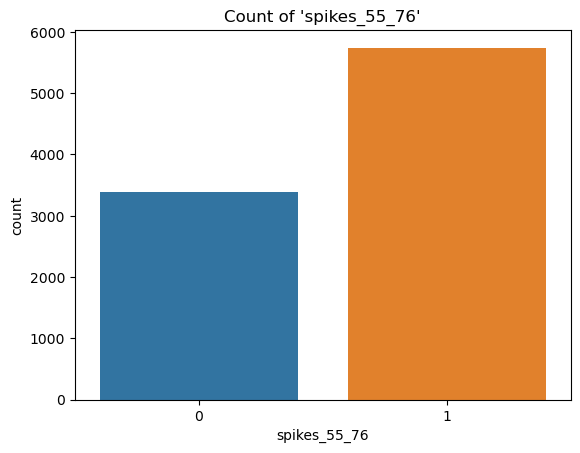

In [48]:
sns.countplot(x='spikes_55_76', data=not_acc)
plt.title("Count of 'spikes_55_76'")
plt.show()


# Accident direction 1-8

## All cases

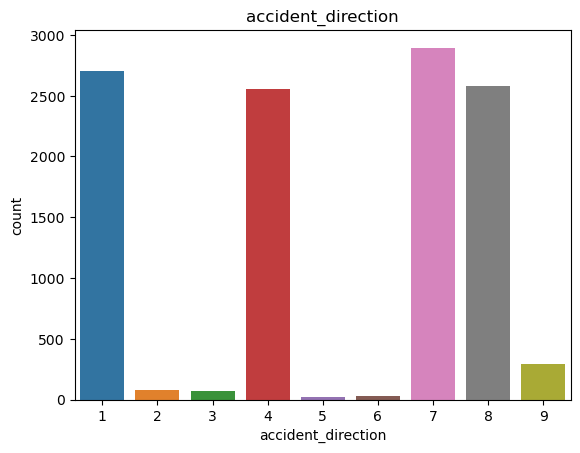

In [49]:
# Plot using seaborn
sns.countplot(data=df, x='accident_direction')
plt.title("accident_direction")
plt.show()


## Real Accidents

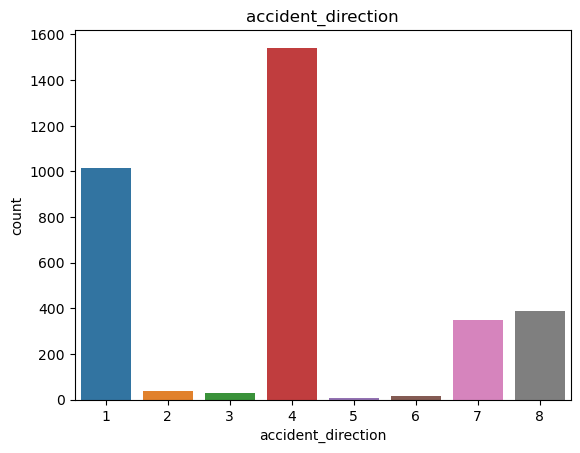

In [50]:
sns.countplot(x='accident_direction', data=real_acc)
plt.title("accident_direction")
plt.show()


## Not Accidents

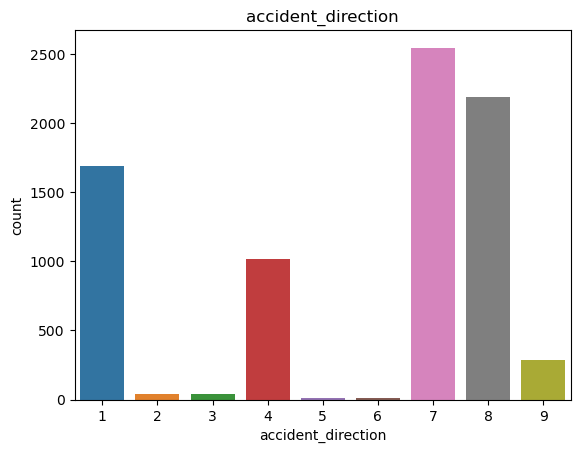

In [51]:
sns.countplot(x='accident_direction', data=not_acc)
plt.title("accident_direction")
plt.show()


# Accident direction - Right, Back, Front, Left, Roll

## All cases

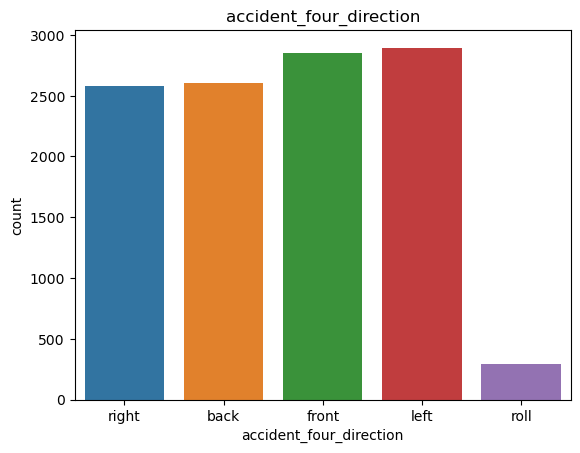

In [52]:
# Plot using seaborn
sns.countplot(data=df, x='accident_four_direction')
plt.title("accident_four_direction")
plt.show()


## Real Accidents

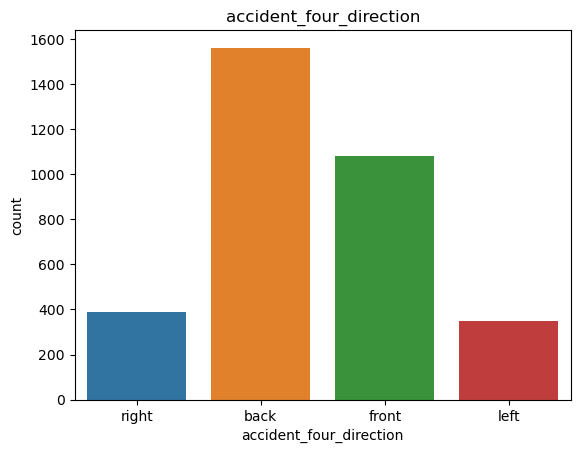

In [53]:
sns.countplot(x='accident_four_direction', data=real_acc)
plt.title("accident_four_direction")
plt.show()


## Not Accidents

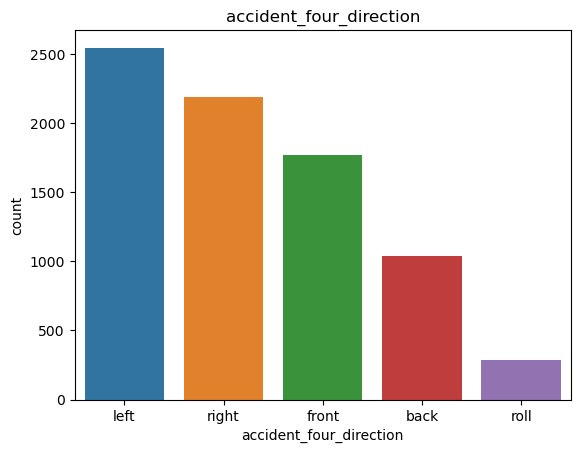

In [54]:
sns.countplot(x='accident_four_direction', data=not_acc)
plt.title("accident_four_direction")
plt.show()


# Correlation

In [55]:
numeric_columns = ['speed_143', 'x_143', 'y_143',
       'z_143','max_45_55_x', 'max_45_55_y', 'max_45_55_z',
       'min_45_55_x', 'min_45_55_y', 'min_45_55_z', 'max_abs_45_55_x',
       'max_abs_45_55_y', 'max_abs_45_55_z', 'max_48_52_x', 'max_48_52_y',
       'max_48_52_z', 'min_48_52_x', 'min_48_52_y', 'min_48_52_z',
       'max_abs_48_52_x', 'max_abs_48_52_y', 'max_abs_48_52_z',
       'mean_45_55_x', 'mean_45_55_y', 'total_accelerated_48_52_xyz', 'mean_45_55_z', 'median_45_55_x',
       'median_45_55_y', 'median_45_55_z', 'std_45_55_x', 'std_45_55_y',
       'std_45_55_z', 'variance_45_55_x', 'variance_45_55_y',
       'variance_45_55_z', 'mean_48_52_x', 'mean_48_52_y', 'mean_48_52_z', 'total_accelerated_48_52_xyz',
       'median_48_52_x', 'median_48_52_y', 'median_48_52_z', 'std_48_52_x',
       'std_48_52_y', 'std_48_52_z', 'variance_48_52_x', 'variance_48_52_y',
       'variance_48_52_z', 'sum_45_55_x','sum_45_55_y', 'sum_45_55_z', 'sum_48_52_x', 'sum_48_52_y',
       'sum_48_52_z', 'dist_max_min_45_55_x', 'dist_max_min_45_55_y',
       'dist_max_min_45_55_z', 'dist_max_min_48_52_x', 'dist_max_min_48_52_y',
       'dist_max_min_48_52_z', 'label']

In [56]:
categorial_columns = ['accident_direction', 'accident_four_direction',
       'spikes_55_76', 'is_grater08_abs_x', 'is_grater08_abs_y', 'is_grater18_abs_z',
       'over_15_on_55', 'over_15_on_70','label']

## Numeric Features correlation

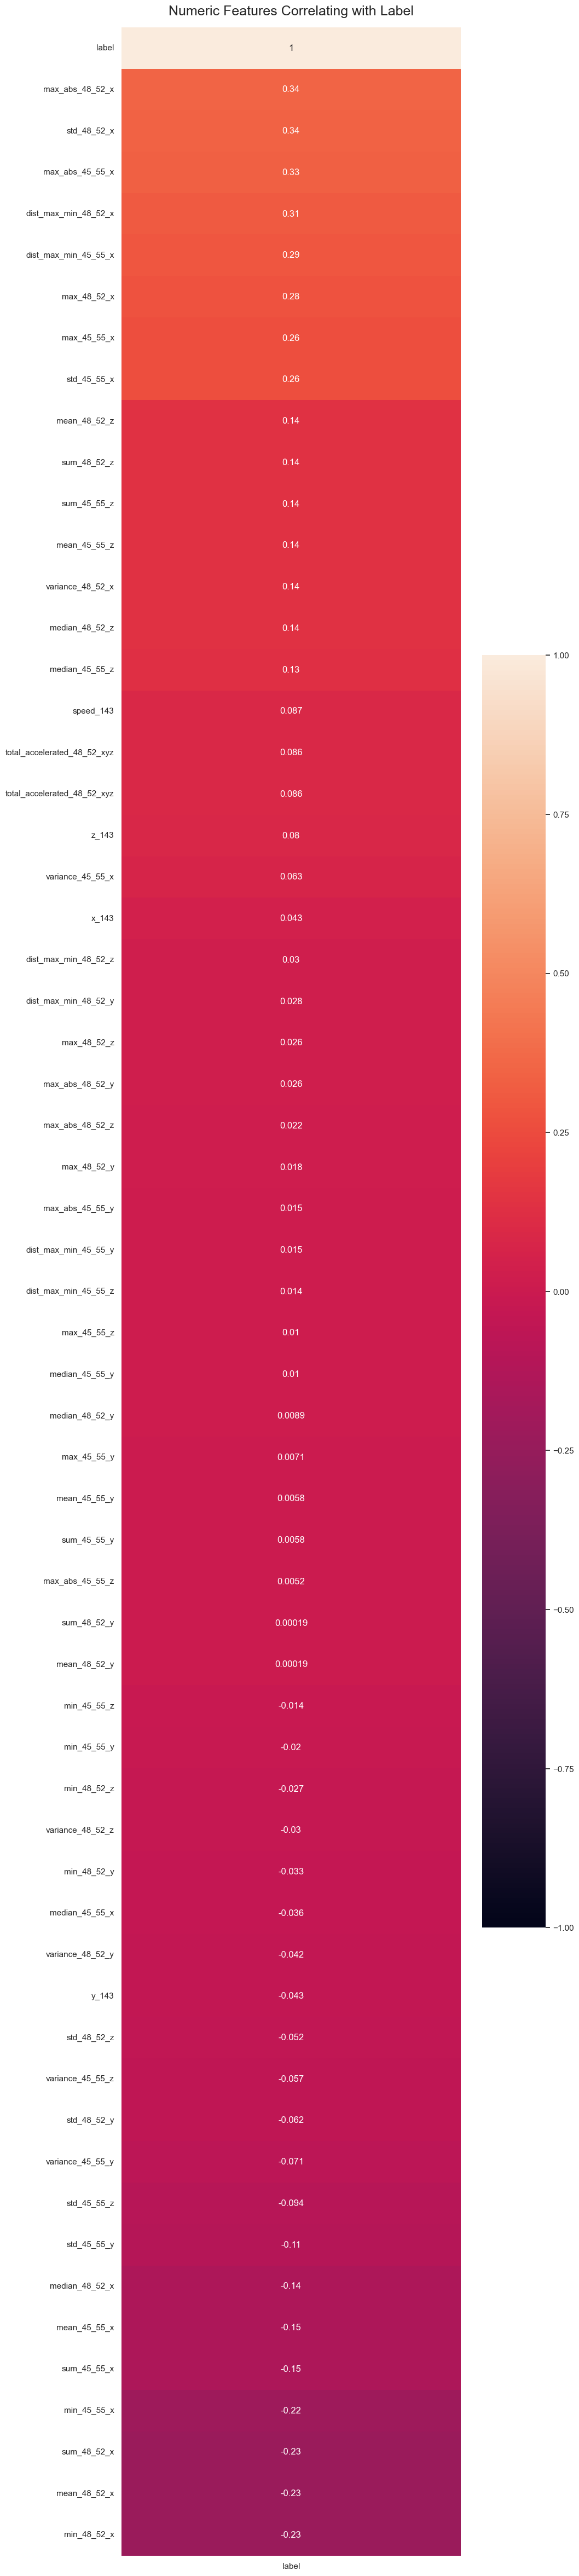

In [57]:
sns.set(rc={'figure.figsize':(10,60)})
heatmap = sns.heatmap(df[numeric_columns].corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Numeric Features Correlating with Label', fontdict={'fontsize':18}, pad=16)
plt.yticks(rotation=0)
plt.show()

## Categorial Features correlation

In [58]:
categorize_df = df[categorial_columns]

df_factorize = categorize_df.apply(lambda x: x.factorize()[0])


### Ctegorial Features Correlating with Label

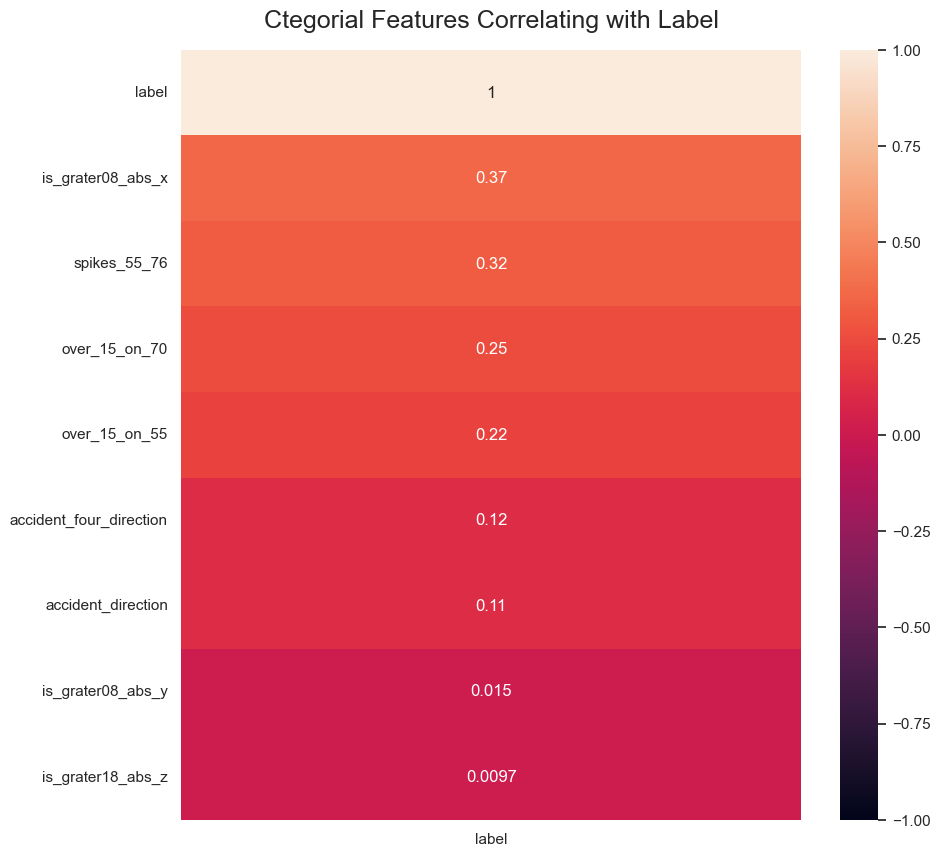

In [59]:
categorize_df = df[categorial_columns]
df_factorize = categorize_df.apply(lambda x: x.factorize()[0])
sns.set(rc={'figure.figsize':(10,10)})
heatmap = sns.heatmap(df_factorize.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Ctegorial Features Correlating with Label', fontdict={'fontsize':18}, pad=16)
plt.yticks(rotation=0)
plt.show()

### Ctegorial Features Correlating All

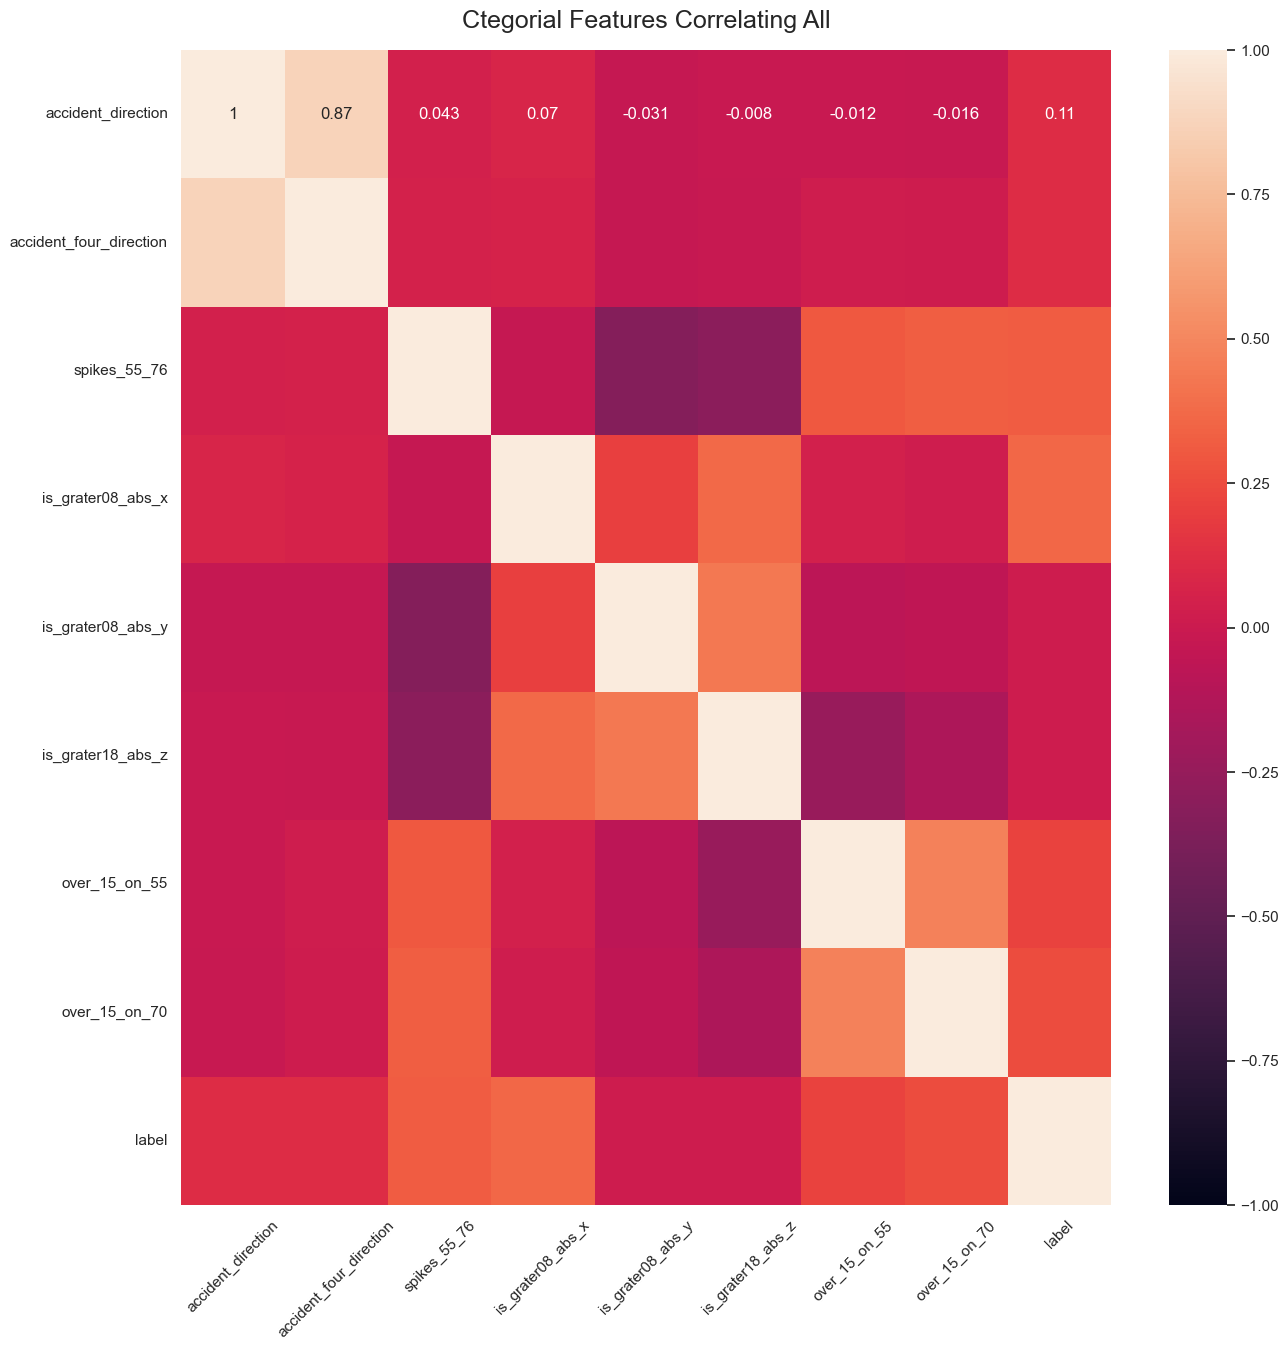

In [60]:
sns.set(rc={'figure.figsize':(15,15)})
heatmap = sns.heatmap(df_factorize.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Ctegorial Features Correlating All', fontdict={'fontsize':18}, pad=16)
plt.xticks(rotation=45)
plt.show()

## Chi-test categorial features

In [61]:
cat_df = df[['spikes_55_76', 'is_grater08_abs_x', 'is_grater08_abs_y', 'is_grater18_abs_z','over_15_on_55', 'over_15_on_70','label']]
X=cat_df.iloc[:,:-1] 
y=cat_df.iloc[:,-1]  
f_score=chi2(X,y)   
p_value=pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)
p_value

over_15_on_70        2.034346e-126
is_grater08_abs_x    2.535451e-119
spikes_55_76          3.804301e-93
over_15_on_55         1.665097e-88
is_grater08_abs_y     2.705761e-01
is_grater18_abs_z     4.228039e-01
dtype: float64

If we see above plot we can conclude that "is_greater08_abs_y" feature and "is_greater18_abs_z" feature has highest p_value (To be precise approximately 0.3 and 3.7). According to the literature if p_value >0.05 hence "is_greater08_abs_y" feature and "is_greater18_abs_z" does not have significance on target/lable variable.



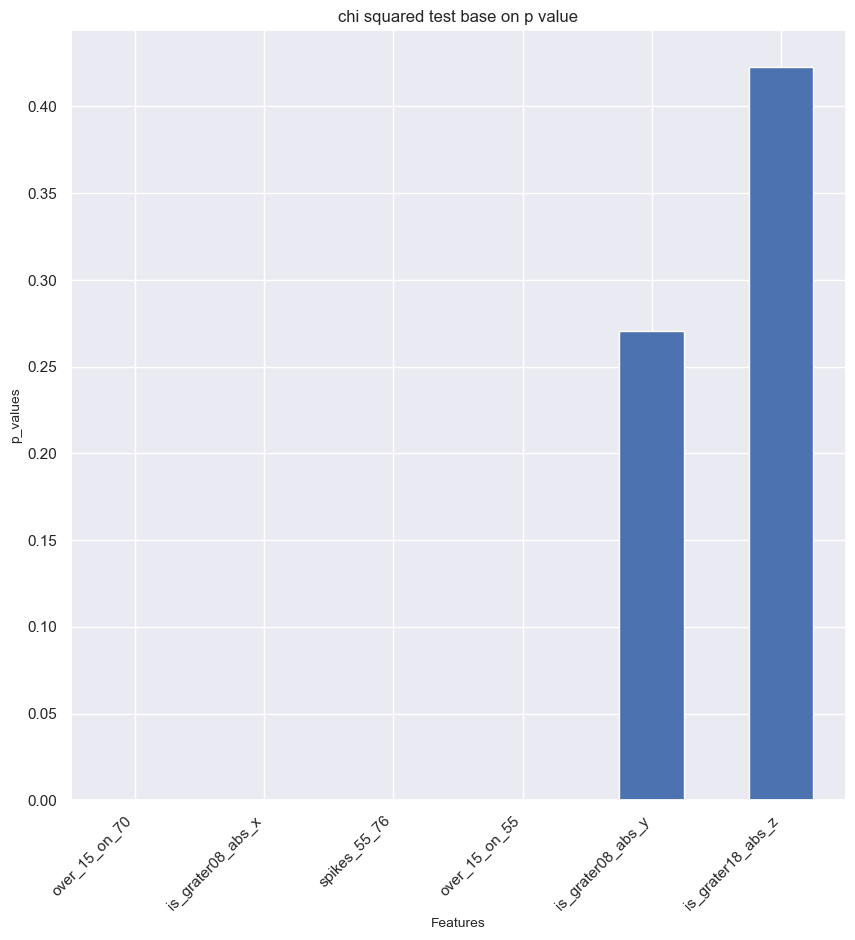

In [62]:
plt.figure(figsize=(10, 10))
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylabel("p_values",fontsize=10)
plt.title("chi squared test base on p value")
plt.show()

In [63]:
np.mean(real_acc['mean_48_52_z'])

0.9652795270469997

In [64]:
np.mean(not_acc['mean_48_52_z'])

0.8765284492661136

In [65]:
count = 0
count_not = 0
for _, row in real_acc.iterrows():

  first_rule = row['max_abs_48_52_x'] > 1.5
  second_rule = (not row['over_15_on_70'] and not row['spikes_55_76'] and row['max_abs_48_52_x'] > 0.5)

  if (first_rule or second_rule):  
    count+=1
  else:
    count_not+=1
print(f'Real Accidents:\nGot: {count} Out of: {count + count_not}')

Real Accidents:
Got: 3021 Out of: 3383


In [66]:
count = 0
count_not = 0
for _, row in not_acc.iterrows():

  first_rule = row['max_abs_48_52_x'] > 1.5
  second_rule = (not row['over_15_on_70'] and not row['spikes_55_76'] and row['max_abs_48_52_x'] > 0.5)

  if (first_rule or second_rule):
    count_not+=1
  else:
    count+=1
print(f'Not Accidents:\nGot: {count} Out of: {count + count_not}')

Not Accidents:
Got: 5254 Out of: 7835


In [67]:
count = 0
count_not = 0
for _, row in real_acc.iterrows():

  first_rule = row['max_abs_48_52_x'] > 1.5
  second_rule = (not row['over_15_on_70'] and not row['spikes_55_76'])
  third_rule = (6 < row['accident_direction'] < 9)
  forth_rule = 5 > row['max_abs_48_52_y'] > 0.1

  if (third_rule and forth_rule):  
    count+=1
  else:
    count_not+=1
print(f'Real Accidents:\nGot: {count} Out of: {count + count_not}')

Real Accidents:
Got: 649 Out of: 3383


In [68]:
count = 0
count_not = 0
for _, row in not_acc.iterrows():
  
  first_rule = row['max_abs_48_52_x'] > 1.5
  second_rule = (not row['over_15_on_70'] and not row['spikes_55_76'])
  third_rule = (6 < row['accident_direction'] < 9)
  forth_rule = 0.5 > row['max_abs_48_52_y'] > 0.1

  if (third_rule and forth_rule):
    count_not+=1
  else:
    count+=1
print(f'Not Accidents:\nGot: {count} Out of: {count + count_not}')

Not Accidents:
Got: 7453 Out of: 7835


In [69]:
count = 0
count_not = 0
for _, row in real_acc.iterrows():
  if (row['dist_max_min_48_52_x'] > 1.3 and row['dist_max_min_48_52_y'] > 1.2) or (not row['over_15_on_70'] and not row['spikes_55_76']):
    count+=1
  else:
    count_not+=1
print(f'Real Accidents:\nGot: {count} Out of: {count + count_not}')

Real Accidents:
Got: 3003 Out of: 3383


In [70]:
count = 0
count_not = 0
for _, row in real_acc.iterrows():
  if (row['dist_max_min_48_52_x'] > 1.3 and row['dist_max_min_48_52_y'] > 1.2) or ( row['over_15_on_70'] and row['over_15_on_55'] or not row['spikes_55_76']):
    count+=1
  else:
    count_not+=1
print(f'Real Accidents:\nGot: {count} Out of: {count + count_not}')

Real Accidents:
Got: 3077 Out of: 3383


In [71]:
count = 0
count_not = 0
for _, row in not_acc.iterrows():
  if (row['dist_max_min_48_52_x'] > 1.3 and row['dist_max_min_48_52_y'] > 1.2) or ( row['over_15_on_70'] and row['over_15_on_55'] or not row['spikes_55_76']):
    count_not+=1
  else:
    count+=1
print(f'Not Accidents:\nGot: {count} Out of: {count + count_not}')

Not Accidents:
Got: 2663 Out of: 7835


In [72]:
count = 0
count_not = 0
for _, row in not_acc.iterrows():
  if (row['dist_max_min_48_52_x'] > 1.3 and row['dist_max_min_48_52_y'] > 1.2) or (not row['over_15_on_70'] and not row['spikes_55_76']):
    count_not+=1
  else:
    count+=1
print(f'Not Accidents:\nGot: {count} Out of: {count + count_not}')

Not Accidents:
Got: 3524 Out of: 7835


In [73]:
count = 0
count_not = 0
for _, row in real_acc.iterrows():
  if row['dist_max_min_48_52_x'] > 0.8 and row['dist_max_min_48_52_y'] > 0.8 or not row['over_15_on_70']:
    count+=1
  else:
    count_not+=1
print(count)

3310


In [74]:
count = 0
count_not = 0
for _, row in not_acc.iterrows():
  if row['dist_max_min_48_52_x'] > 0.8 and row['dist_max_min_48_52_y'] > 0.8 or not row['over_15_on_70']:
    count_not+=1
  else:
    count+=1
print(count)

1028
